In [ ]:
# 

In [1]:
# %matplotlib notebook 
# Uncomment above for interactive plots
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sym
from sympy import *
from scipy import integrate
import scipy.optimize
import scipy.special
cmap = plt.get_cmap("tab10")
from matplotlib import cm
import itertools
import os, time
from scipy.optimize import fsolve
import scipy.optimize as optimize

def Gauss(x, A, u, s, C):
    return A*np.exp(-(x-u)**2/(2*s**2))+C

def Gauss0(x, A, u, s):
    return A*np.exp(-(x-u)**2/(2*s**2))

def Sig(x, A, u, f, C):
    return A*scipy.special.erf((x-u)/f)+C

def Lor(x, A, u, T, C):
    return np.pi*T/2*A*T/(2*np.pi*((x-u)**2+(T**2)/4)) + C

def LoadFrame(FrameName):
    Frame = []
    OUT = ['LBU2','P1U2','P2U2','LTU2','LBS2']
    for nOUT in range(0,len(OUT)):
        try:
            temp = np.load(r'C:\Users\21705319\ Python Scripts\Project 1\AbaqusXYData\Final'+'\\'+FrameName+'_'+OUT[nOUT]+'.npy') 
            Frame.append(temp[np.argsort(temp[:, 0])])
        except:
            print('File '+FrameName+'.npy can not be found')
            return []
    return Frame

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Have:
- XY data file for each (Sample,Layer,Preload,Output) combination
- Different number of points for the outputs depending on where they're taken from

Want:
- Ability to specify any 2 variables for a 2D plot or any 3 for a 3D plot
- Import relevant results, generate plot, delete variables from memory
- Ability to loop the above to generate ranges of results

Plan:
- Specify controlled variables and their value for the plot
- Specify axis variables
- Specify required output style and any metrics
- Import required data
- Make any transformations required
- Find any single points from XY data required
- Visualise results

In [2]:
# ID: Inclusion Depth
# IT: Inclusion Thickness
# IR: Inclusion Radius
# IE: Inclusion Elasticity
# LT: Layer Thickness
# LE: Layer Elasticity
# P: Preload (strain in the layer in the far field)
# OUT: various 2D plots with radial coordinate
    # LBU2: Layer Bottom Axial Displacement
    # P1U2: 1st Particle Layer Axial Displacement (only valid for layer thickness > 500um)
    # P2U2: 2nd Particle Layer Axial Displacement (only valid for layer thickness > 1mm)
    # LTU2: Layer Top Axial Displacement (can be treated as a single point but data is a 2d Plot)
    # LBS2: Layer Bottom Axial Stress

File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_10_LE_25kPa_P_22p5%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_10_LE_25kPa_P_25%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_10_LE_25kPa_P_27p5%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_10_LE_25kPa_P_30%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_7p5_LE_25kPa_P_22p5%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_7p5_LE_25kPa_P_25%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_7p5_LE_25kPa_P_27p5%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_7p5_LE_25kPa_P_30%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_5_LE_25kPa_P_22p5%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_5_LE_25kPa_P_25%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_5_LE_25kPa_P_27p5%.npy can not be found
File Mesh17-Final_ID_0p5_IT_3_IR_1_IE_10x_LT_5_LE_25kPa_P_30%.n

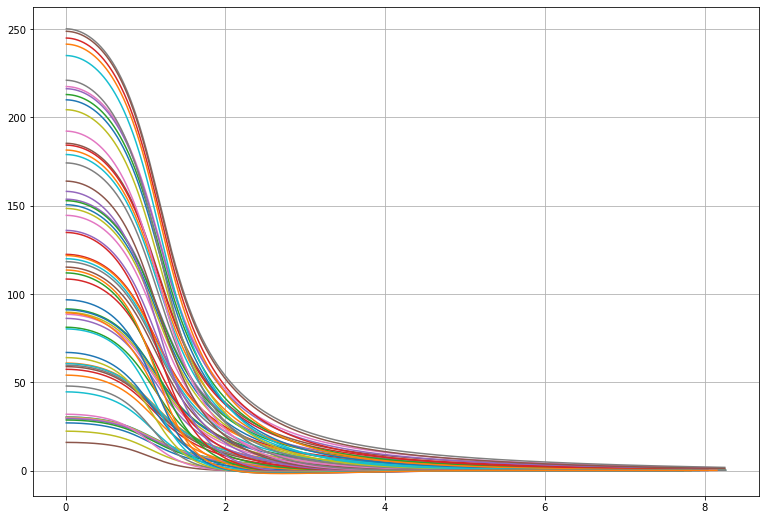

In [3]:
# Change variables at the beginning of the loop, control plotting with triple quotes
DisplacementDiff_LB = []
DisplacementDiffFWHM_LB = []
DisplacementDiffGaussFWHM_LB = []

DisplacementDiff_P1 = []
DisplacementDiffFWHM_P1 = []
DisplacementDiffGaussFWHM_P1 = []

DisplacementDiff_P2 = []
DisplacementDiffFWHM_P2 = []
DisplacementDiffGaussFWHM_P2 = []

StressContrast_OP = []
StressContrastRatio_OP = []
StressFWHM_OP = []
StressGaussFWHM_OP = []
StressSigFWHM_OP = []
Stress10t90_OP = []
StressGaussFWHM_OP_FitStandardError = []
StressRMSE_OP = []
Stress_OP = []

StressContrast_SOP = []
StressContrastRatio_SOP = []
StressFWHM_SOP = []
StressGaussFWHM_SOP = []
Stress10t90_SOP = []
StressRMSE_SOP = []
Stress_SOP = []
    
StressContrast_BOP = []
StressContrastRatio_BOP = []
StressFWHM_BOP = []
StressGaussFWHM_BOP = []
Stress10t90_BOP = []
StressRMSE_BOP = []
Stress_BOP = []

StressContrast_BOP2 = []
StressContrastRatio_BOP2 = []
StressFWHM_BOP2 = []
StressGaussFWHM_BOP2 = []
StressSigFWHM_BOP2 = []
Stress10t90_BOP2 = []
StressRMSE_BOP2 = []
Stress_BOP2 = []
    
StressContrast_LB = []
StressMaxContrast_LB = []
StressMaxContrast_OP = []
StressFWHM_LB = []
StressGaussFWHM_LB = []
Stress10t90_LB = []
StressRMSE_LB = []
Stress_LB = []

Preload = [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3] # Strain in the layer
PreloadN = ['2p5%','5%','7p5%','10%','12p5%','15%','17p5%','20%','22p5%','25%','27p5%','30%']
LayerElasticity = [25000]
LayerElasticityN = ['25kPa']
BackgroundElasticity = 25000
InclusionElasticity = [50000,5*25000,7.5*25000,10*25000] # Doesn't converge after 7.5x background
InclusionElasticityN = ['2x','5x','7p5x','10x']
LayerThickness = [0.01,0.0075,0.005,0.004,0.003,0.002,0.001,0.0005]
LayerThicknessN = ['10','7p5','5','4','3','2','1','0p5']
SampleThickness = 0.005
InclusionDepth = [60e-06,500e-06,0.001,0.002] # Minimum 60e-06
InclusionDepthN = ['0p05','0p5','1','2']
InclusionThickness = [500e-06,0.001,0.002,0.003] # Minimum 10e-06, allowed to have inclusion touching bottom of sample
InclusionThicknessN = ['0p5','1','2','3']
InclusionRadius = [500e-06,0.001,0.002,0.003] # Minimum 10e-06
InclusionRadiusN = ['0p5','1','2','3']

# Set controlled variables using nVar, others will change via loop below
ModelName = 'Mesh17-Final'
IDN = ['0p05','0p5','1','2']
ID = [60e-06,500e-06,0.001,0.002] # yes the first depth is actually 60um, I started with a 50um naming policy and can't change it any more
nID = 1
ITN = ['0p5','1','2','3']
IT = [500e-06,0.001,0.002,0.003] # Minimum 10e-06, allowed to have inclusion touching bottom of sample
nIT = 3
IRN = ['0p5','1','2','3']
IR = [500e-06,0.001,0.002,0.003] # Minimum 10e-06
nIR = 1
IEN = ['2x','5x','7p5x','10x']
IE = [50000,5*25000,7.5*25000,10*25000] # Doesn't converge after 7.5x background
nIE = 3
LTN = ['10','7p5','5','4','3','2','1','0p5'] # Should reverse?
LT = [0.01,0.0075,0.005,0.004,0.003,0.002,0.001,0.0005]
nLT = -1
LEN = ['25kPa']
LE = [25000]
nLE = 0
PN = ['2p5%','5%','7p5%','10%','12p5%','15%','17p5%','20%','22p5%','25%','27p5%','30%']
P = [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3]
nP = 7
OUTN = ['LBU2','P1U2','P2U2','LTU2','LBS2']

plt.figure(figsize=(13,9)) # for checking intermediate steps
ax = plt.subplot(1,1,1)
#plt.plot(x, y)

Frames = []
v1s = []
v2s = []
for v1,nLT in enumerate(range(0,len(LTN))):
    v1s.append(LT[v1])
    #nIT = nIR
    for v2,nP in enumerate(range(0,len(PN))):           # Use index and list variables in for loops to control what is being plotted
        if v1 == 0: v2s.append(P[v2])
        # Need to change things above here to control what variables are used
        def s22(NE_s):                     # Needs to change with layer elasticity
            LE_s = np.log(NE_s+1)
            return LE[nLE]*LE_s
        
        FrameName = ModelName+'_ID_'+IDN[nID]+'_IT_'+ITN[nIT]+'_IR_'+IRN[nIR]+'_IE_'+IEN[nIE]+'_LT_'+LTN[nLT]+'_LE_'+LEN[nLE]+'_P_'+PN[nP]
        temp = LoadFrame(FrameName)
        if temp == []:
            if v2==0:
                DisplacementDiff_LB.append([np.nan])
                DisplacementDiffFWHM_LB.append([np.nan])
                DisplacementDiffGaussFWHM_LB.append([np.nan])
                DisplacementDiff_P1.append([np.nan])
                DisplacementDiffFWHM_P1.append([np.nan])
                DisplacementDiffGaussFWHM_P1.append([np.nan])
                DisplacementDiff_P2.append([np.nan])
                DisplacementDiffFWHM_P2.append([np.nan])
                DisplacementDiffGaussFWHM_P2.append([np.nan])
                StressContrast_OP.append([np.nan])
                StressContrastRatio_OP.append([np.nan])
                StressFWHM_OP.append([np.nan])
                StressGaussFWHM_OP.append([np.nan])
                StressSigFWHM_OP.append([np.nan])
                Stress10t90_OP.append([np.nan])
                #StressGaussFWHM_OP_FitStandardError.append([np.nan])
                StressRMSE_OP.append([np.nan])
                Stress_OP.append([[[np.nan,np.nan]]])
                StressContrast_SOP.append([np.nan])
                StressContrastRatio_SOP.append([np.nan])
                StressFWHM_SOP.append([np.nan])
                StressGaussFWHM_SOP.append([np.nan])
                Stress10t90_SOP.append([np.nan])
                StressRMSE_SOP.append([np.nan])
                Stress_SOP.append([[[np.nan,np.nan]]])
                StressContrast_BOP.append([np.nan])
                StressContrastRatio_BOP.append([np.nan])
                StressFWHM_BOP.append([np.nan])
                StressGaussFWHM_BOP.append([np.nan])
                Stress10t90_BOP.append([np.nan])
                StressRMSE_BOP.append([np.nan])
                Stress_BOP.append([[[np.nan,np.nan]]])
                StressContrast_BOP2.append([np.nan])
                StressContrastRatio_BOP2.append([np.nan])
                StressFWHM_BOP2.append([np.nan])
                StressGaussFWHM_BOP2.append([np.nan])
                StressSigFWHM_BOP2.append([np.nan])
                Stress10t90_BOP2.append([np.nan])
                StressRMSE_BOP2.append([np.nan])
                Stress_BOP2.append([[[np.nan,np.nan]]])
                StressContrast_LB.append([np.nan])
                StressMaxContrast_LB.append([np.nan])
                StressMaxContrast_OP.append([np.nan])
                StressFWHM_LB.append([np.nan])
                StressGaussFWHM_LB.append([np.nan])
                Stress10t90_LB.append([np.nan])
                StressRMSE_LB.append([np.nan])
                Stress_LB.append([[[np.nan,np.nan]]])
            else:
                DisplacementDiff_LB[-1].append(np.nan)
                DisplacementDiffFWHM_LB[-1].append(np.nan)
                DisplacementDiffGaussFWHM_LB[-1].append(np.nan)
                DisplacementDiff_P1[-1].append(np.nan)
                DisplacementDiffFWHM_P1[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P1[-1].append(np.nan)
                DisplacementDiff_P2[-1].append(np.nan)
                DisplacementDiffFWHM_P2[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P2[-1].append(np.nan)
                StressContrast_OP[-1].append(np.nan)
                StressContrastRatio_OP[-1].append(np.nan)
                StressFWHM_OP[-1].append(np.nan)
                StressGaussFWHM_OP[-1].append(np.nan)
                Stress10t90_OP[-1].append(np.nan)
                StressSigFWHM_OP[-1].append(np.nan)
                #StressGaussFWHM_OP_FitStandardError[-1].append(np.nan)
                StressRMSE_OP[-1].append(np.nan)
                Stress_OP[-1].append([[np.nan,np.nan]])
                StressContrast_SOP[-1].append(np.nan)
                StressContrastRatio_SOP[-1].append(np.nan)
                StressFWHM_SOP[-1].append(np.nan)
                StressGaussFWHM_SOP[-1].append(np.nan)
                Stress10t90_SOP[-1].append(np.nan)
                StressRMSE_SOP[-1].append(np.nan)
                Stress_SOP[-1].append([[np.nan,np.nan]])
                StressContrast_BOP[-1].append(np.nan)
                StressContrastRatio_BOP[-1].append(np.nan)
                StressFWHM_BOP[-1].append(np.nan)
                StressGaussFWHM_BOP[-1].append(np.nan)
                Stress10t90_BOP[-1].append(np.nan)
                StressRMSE_BOP[-1].append(np.nan)
                Stress_BOP[-1].append([[np.nan,np.nan]])
                StressContrast_BOP2[-1].append(np.nan)
                StressContrastRatio_BOP2[-1].append(np.nan)
                StressFWHM_BOP2[-1].append(np.nan)
                StressGaussFWHM_BOP2[-1].append(np.nan)
                StressSigFWHM_BOP2[-1].append(np.nan)
                Stress10t90_BOP2[-1].append(np.nan)
                StressRMSE_BOP2[-1].append(np.nan)
                Stress_BOP2[-1].append([[np.nan,np.nan]])
                StressContrast_LB[-1].append(np.nan)
                StressMaxContrast_LB[-1].append(np.nan)
                StressMaxContrast_OP[-1].append(np.nan)
                StressFWHM_LB[-1].append(np.nan)
                StressGaussFWHM_LB[-1].append(np.nan)
                Stress10t90_LB[-1].append(np.nan)
                StressRMSE_LB[-1].append(np.nan)
                Stress_LB[-1].append([[np.nan,np.nan]])
            continue
        
        # Displacement Variables Processing
        x = moving_average(temp[0][:,0],20)
        #y = moving_average(temp[0][:,1]-temp[0][-1,1],20)
        y = moving_average(temp[0][:,1]-(-P[nP]*SampleThickness),20)
        plt.plot(np.asarray(x)*10**3,np.asarray(y)*10**6, label='LB')
        if v2 == 0:
            DisplacementDiff_LB.append([y[0]])
        else:
            DisplacementDiff_LB[-1].append(y[0])
        g = np.abs(np.gradient(y,x)) # only care about FWHM so positive or negative doesn't matter
        m = max(g) # max value
        mi = (np.where(g == m))[0][0] # index of max value
        mx = x[mi] # x coord of max value
        g2 = np.abs(g-m/2)
        if mi>0:
            lg = min(g2[:mi])
        else:
            lg = g2[mi]
        li = (np.where(g2==lg))[0][0]
        lx = x[li]
        rg = min(g2[mi:])
        ri = (np.where(g2==rg))[0][0]
        rx = x[ri]
        if v2==0:
            DisplacementDiffFWHM_LB.append([np.abs(rx-lx)])
        else:
            DisplacementDiffFWHM_LB[-1].append(np.abs(rx-lx))
        params, covariance = scipy.optimize.curve_fit(Gauss0, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355]))
        if v2 == 0:
            DisplacementDiffGaussFWHM_LB.append([params[2]*2.355])
        else:
            DisplacementDiffGaussFWHM_LB[-1].append(params[2]*2.355)
        #plt.plot(x, Gauss0(x, *params), '--')
        #plt.plot(np.asarray(x)*10**3,np.asarray(g)*10**3)
        if nLT==7:
            if nP==5:
                #plt.plot(x*10**3, y*10**6)
                Det_x = x*10**3
                Det_y = y*10**6
        
        if LT[nLT] > 0.0005:
            x = moving_average(temp[1][:,0],20)
            y = moving_average(temp[1][:,1]-temp[1][-1,1],20)
            #plt.plot(np.asarray(x)*10**3,np.asarray(y)*10**6, label='P1')
            if v2 == 0:
                DisplacementDiff_P1.append([y[0]-y[-1]])
            else:
                DisplacementDiff_P1[-1].append(y[0]-y[-1])
            g = np.abs(np.gradient(y,x)) # only care about FWHM so positive or negative doesn't matter
            m = max(g) # max value
            mi = (np.where(g == m))[0][0] # index of max value
            mx = x[mi] # x coord of max value
            g2 = np.abs(g-m/2)
            if mi>0:
                lg = min(g2[:mi])
            else:
                lg = g2[mi]
            li = (np.where(g2==lg))[0][0]
            lx = x[li]
            rg = min(g2[mi:])
            ri = (np.where(g2==rg))[0][0]
            rx = x[ri]
            if v2==0:
                DisplacementDiffFWHM_P1.append([np.abs(rx-lx)])
            else:
                DisplacementDiffFWHM_P1[-1].append(np.abs(rx-lx))
            params, covariance = scipy.optimize.curve_fit(Gauss0, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355]))
            if v2 == 0:
                DisplacementDiffGaussFWHM_P1.append([params[2]*2.355])
            else:
                DisplacementDiffGaussFWHM_P1[-1].append(params[2]*2.355)
        else:
            if v2==0:
                DisplacementDiff_P1.append([np.nan])
                DisplacementDiffGaussFWHM_P1.append([np.nan])
                DisplacementDiffFWHM_P1.append([np.nan])
            else:
                DisplacementDiff_P1[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P1[-1].append(np.nan)
                DisplacementDiffFWHM_P1[-1].append(np.nan)

        if LT[nLT] > 0.001:
            x = moving_average(temp[2][:,0],20)
            y = moving_average(temp[2][:,1]-temp[2][-1,1],20)
            #plt.plot(np.asarray(x)*10**3,np.asarray(y)*10**6, label='P2')
            if v2 == 0:
                DisplacementDiff_P2.append([y[0]-y[-1]])
            else:
                DisplacementDiff_P2[-1].append(y[0]-y[-1])
            g = np.abs(np.gradient(y,x)) # only care about FWHM so positive or negative doesn't matter
            m = max(g) # max value
            mi = (np.where(g == m))[0][0] # index of max value
            mx = x[mi] # x coord of max value
            g2 = np.abs(g-m/2)
            if mi>0:
                lg = min(g2[:mi])
            else:
                lg = g2[mi]
            li = (np.where(g2==lg))[0][0]
            lx = x[li]
            rg = min(g2[mi:])
            ri = (np.where(g2==rg))[0][0]
            rx = x[ri]
            if v2==0:
                DisplacementDiffFWHM_P2.append([np.abs(rx-lx)])
            else:
                DisplacementDiffFWHM_P2[-1].append(np.abs(rx-lx))
            params, covariance = scipy.optimize.curve_fit(Gauss0, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355]))
            if v2 == 0:
                DisplacementDiffGaussFWHM_P2.append([params[2]*2.355])
            else:
                DisplacementDiffGaussFWHM_P2[-1].append(params[2]*2.355)
            #plt.plot(x, Gauss0(x, *params), '--')
            #plt.plot(x, g)
        else:
            if v2==0:
                DisplacementDiff_P2.append([np.nan])
                DisplacementDiffGaussFWHM_P2.append([np.nan])
                DisplacementDiffFWHM_P2.append([np.nan])
            else:
                DisplacementDiff_P2[-1].append(np.nan)
                DisplacementDiffGaussFWHM_P2[-1].append(np.nan)
                DisplacementDiffFWHM_P2[-1].append(np.nan)
        
        # Stress Variables LB
        x = moving_average(temp[4][:,0],20)
        y = moving_average(temp[4][:,1],20)
        x = moving_average(x,20)
        y = moving_average(y,20)
        # Stress
        if v2==0:
            Stress_LB.append([list(zip(x,y))])
        else:
            Stress_LB[-1].append(list(zip(x,y)))
        # Stress Contrast
        if v2 == 0:
            StressContrast_LB.append([y[0]/(BackgroundElasticity*np.log(1-P[nP]))])
        else:
            StressContrast_LB[-1].append(y[0]/(BackgroundElasticity*np.log(1-P[nP])))
        # Stress Max Contrast
        if v2 == 0:
            StressMaxContrast_LB.append([min(y)/(BackgroundElasticity*np.log(1-P[nP]))])
        else:
            StressMaxContrast_LB[-1].append(min(y)/(BackgroundElasticity*np.log(1-P[nP])))
        # Stress FWHM
        g = np.gradient(y,x)
        #g = moving_average(g,20)
        #x = moving_average(x,20)
        #y = moving_average(y,20)
        m = max(g) # max value
        mi = (np.where(g == m))[0][0] # index of max value
        mx = x[mi] # x coord of max value
        g2 = np.abs(g-m/2)
        if mi>0:
            lg = min(g2[:mi])
        else:
            lg = g2[mi]
        li = (np.where(g2==lg))[0][0]
        lx = x[li]
        rg = min(g2[mi:])
        ri = (np.where(g2==rg))[0][0]
        rx = x[ri]
        if v2 == 0:
            StressFWHM_LB.append([np.abs(rx-lx)])
        else:
            StressFWHM_LB[-1].append(np.abs(rx-lx))
        # Fitted Stress FWHM
        # old params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([0, 0, 0, -1e2], [5e6, 5e-3, 5e-3, 1e2]))
        params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355, -1e2], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355, 1e2]))
        if v2==0:
            StressGaussFWHM_LB.append([params[2]*2.355])
        else:
            StressGaussFWHM_LB[-1].append(params[2]*2.355)
        #plt.plot(x, Gauss(x, *params), '--')
        #plt.plot(x, g)
        #plt.plot(x, y, label = "Layer Bottom Stress")
        # Sig 10%-90% FWHM
        y_min = min(y)
        y_max = max(y)
        iy_min = np.where(np.abs(y - y_min) == min(np.abs(y - y_min)))[0][0]
        iy_max = np.where(np.abs(y - y_max) == min(np.abs(y - y_max)))[0][0]
        y_10 = y_max + (y_min - y_max)*0.1
        y_90 = y_max + (y_min - y_max)*0.9
        y2 = y[iy_min:iy_max]
        iy_10 = np.where(np.abs(y2 - y_10) == min(np.abs(y2 - y_10)))[0][0] + iy_min
        iy_90 = np.where(np.abs(y2 - y_90) == min(np.abs(y2 - y_90)))[0][0] + iy_min
        if v2 ==0:
            Stress10t90_LB.append([np.abs(x[iy_90]-x[iy_10])])
        else:
            Stress10t90_LB[-1].append(np.abs(x[iy_90]-x[iy_10]))
        # Stress RMSE
        rmse_temp = np.sqrt((y-y)**2) # Stress at LB is the baseline for the error comparison
        # want error over twice radius of inclusion as % of background value
        if v2==0:
            StressRMSE_LB.append([np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100]) # RMSE over first 1mm as % of background
        else:
            StressRMSE_LB[-1].append(np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100)
        
        # Stress variables for OP
        x = moving_average(temp[0][:,0],20)
        y = moving_average(s22((np.interp(temp[0][:,0], temp[3][:,0], temp[3][:,1]) - temp[0][:,1])/LT[nLT]),20)
        # Stress
        if v2==0:
            Stress_OP.append([list(zip(x,y))])
        else:
            Stress_OP[-1].append(list(zip(x,y)))
        # Stress Contrast
        if v2==0:
            StressContrast_OP.append([y[0]/(BackgroundElasticity*np.log(1-P[nP]))])
        else:
            StressContrast_OP[-1].append(y[0]/(BackgroundElasticity*np.log(1-P[nP])))
        # Stress Max Contrast
        if v2==0:
            StressMaxContrast_OP.append([min(y)/(BackgroundElasticity*np.log(1-P[nP]))])
        else:
            StressMaxContrast_OP[-1].append(min(y)/(BackgroundElasticity*np.log(1-P[nP])))
        # Stress Contrast Ratio
        try:
            if v2==0:
                StressContrastRatio_OP.append([StressContrast_OP[-1][-1]/StressContrast_LB[-1][-1]])
            else:
                StressContrastRatio_OP[-1].append(StressContrast_OP[-1][-1]/StressContrast_LB[-1][-1])
        except:
            if v2==0:
                StressContrastRatio_OP.append([np.nan])
            else:
                StressContrastRatio_OP[-1].append(np.nan)
        # Stress FWHM
        g = np.gradient(y,x)
        m = max(g) # max value
        mi = (np.where(g == m))[0][0] # index of max value
        mx = x[mi] # x coord of max value
        g2 = np.abs(g-m/2)
        if mi>0:
            lg = min(g2[:mi])
        else:
            lg = g2[mi]
        li = (np.where(g2==lg))[0][0]
        lx = x[li]
        rg = min(g2[mi:])
        ri = (np.where(g2==rg))[0][0]
        rx = x[ri]
        if v2==0:
            StressFWHM_OP.append([np.abs(rx-lx)])
        else:
            StressFWHM_OP[-1].append(np.abs(rx-lx))
        # Fitted Stress FWHM                               GAUSS FIT USES JUST THE TOP HALF OF THE PEAK
        params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355, -1e2], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355, 1e2]))
        #StressGaussFWHM_OP_FitStandardError[t,p] = covariance[2,2]**2
        if v2==0:
            StressGaussFWHM_OP.append([params[2]*2.355])
        else:
            StressGaussFWHM_OP[-1].append(params[2]*2.355)

        #plt.plot(x, Gauss(x, *params), '--')
        #plt.plot(x, g)
        #plt.plot(x, y, label = "OP Inferred Stress")
        # Sig 10%-90% FWHM
        y_min = min(y)
        y_max = max(y)
        iy_min = np.where(np.abs(y - y_min) == min(np.abs(y - y_min)))[0][0]
        iy_max = np.where(np.abs(y - y_max) == min(np.abs(y - y_max)))[0][0]
        y_10 = y_max + (y_min - y_max)*0.1
        y_90 = y_max + (y_min - y_max)*0.9
        y2 = y[iy_min:iy_max]
        iy_10 = np.where(np.abs(y2 - y_10) == min(np.abs(y2 - y_10)))[0][0] + iy_min
        iy_90 = np.where(np.abs(y2 - y_90) == min(np.abs(y2 - y_90)))[0][0] + iy_min
        if v2 ==0:
            Stress10t90_OP.append([np.abs(x[iy_90]-x[iy_10])])
        else:
            Stress10t90_OP[-1].append(np.abs(x[iy_90]-x[iy_10]))
        # Sig Fitted Stress
        #ix_L = np.where(np.abs(x - (mx-1.5*np.abs(rx-lx))) == min(np.abs(x - (mx-1.5*np.abs(rx-lx)))))[0][0]
        #ix_R = np.where(np.abs(x - (mx+1.5*np.abs(rx-lx))) == min(np.abs(x - (mx+1.5*np.abs(rx-lx)))))[0][0]
        #params, covariance = scipy.optimize.curve_fit(Sig, x[ix_L:ix_R], y[ix_L:ix_R], bounds=([np.abs(min(y)-max(y))/2*0.9, mx-0.001, 0, 2*y[0]], [np.abs(min(y)-max(y))/2*1.1, mx+0.001, (np.abs(rx-lx))*10/2.355, 0]))
        #old #params, covariance = scipy.optimize.curve_fit(Sig, x, y, bounds=([0, mx-0.001, 0, 2*y[0]], [2*np.abs(y[-1]-y[0]), mx+0.001, (np.abs(rx-lx))*10/2.355, 0]))
        # Sig Fitted Stress New
        ix_L = np.where(np.abs(x - (mx-1*np.abs(rx-lx))) == min(np.abs(x - (mx-1*np.abs(rx-lx)))))[0][0]
        ix_R = np.where(np.abs(x - (mx+1*np.abs(rx-lx))) == min(np.abs(x - (mx+1*np.abs(rx-lx)))))[0][0]
        params2, covariance = scipy.optimize.curve_fit(Sig, x[ix_L:ix_R], y[ix_L:ix_R], bounds=([np.abs(min(y)-max(y))/2*0.999, mx-0.001, 0, 1.001*(min(y)+max(y))/2], [np.abs(min(y)-max(y))/2*1.001, mx+0.001, (np.abs(rx-lx))*10/2.355, 0.999*(min(y)+max(y))/2]))

        #plt.plot(x, Sig(x, *params2), '--')
        #plt.plot(x, y)
        if v2==0:
            StressSigFWHM_OP.append([params2[2]*2.355/2**0.5])
        else:
            StressSigFWHM_OP[-1].append(params2[2]*2.355/2**0.5)
        # Stress RMSE
        rmse_temp = (np.sqrt((y-np.interp(x, temp[4][:,0], temp[4][:,1]))**2))
        if v2==0:
            StressRMSE_OP.append([np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100]) # RMSE over first 1mm as % of background
        else:
            StressRMSE_OP[-1].append(np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100)
        
        # Stress variables for SOP
        if LT[nLT] > 0.0005:
            x = temp[1][:,0]
            y = s22((np.interp(temp[1][:,0],temp[3][:,0],temp[3][:,1]) - temp[1][:,1])/(LT[nLT]-0.0005))
            # Stress
            if v2==0:
                Stress_SOP.append([list(zip(x,y))])
            else:
                Stress_SOP[-1].append(list(zip(x,y)))
            # Stress Contrast
            if v2==0:
                StressContrast_SOP.append([y[0]/y[-1]])
            else:
                StressContrast_SOP[-1].append(y[0]/y[-1])
            # Stress Contrast Ratio
            try:
                if v2==0:
                    StressContrastRatio_SOP.append([StressContrast_SOP[-1][-1]/StressContrast_LB[-1][-1]])
                else:
                    StressContrastRatio_SOP[-1].append(StressContrast_SOP[-1][-1]/StressContrast_LB[-1][-1])
            except:
                if v2==0:
                    StressContrastRatio_SOP.append([np.nan])
                else:
                    StressContrastRatio_SOP[-1].append(np.nan)
            # Stress FWHM
            g = np.gradient(y,x)
            m = max(g) # max value
            mi = (np.where(g == m))[0][0] # index of max value
            mx = x[mi] # x coord of max value
            g2 = np.abs(g-m/2)
            if mi>0:
                lg = min(g2[:mi])
            else:
                lg = g2[mi]
            li = (np.where(g2==lg))[0][0]
            lx = x[li]
            rg = min(g2[mi:])
            ri = (np.where(g2==rg))[0][0]
            rx = x[ri]
            if v2==0:
                StressFWHM_SOP.append([np.abs(rx-lx)])
            else:
                StressFWHM_SOP[-1].append(np.abs(rx-lx))
            # Fitted Stress FWHM
            params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355, -1e2], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355, 1e2]))
            if v2==0:
                StressGaussFWHM_SOP.append([params[2]*2.355])
            else:
                StressGaussFWHM_SOP[-1].append(params[2]*2.355)
            #plt.plot(x, Gauss(x, *params), '--')
            #plt.plot(x, g)
            #plt.plot(x, y, label = "SOP Inferred Stress")
            # Sig 10%-90% FWHM
            y_min = min(y)
            y_max = max(y)
            iy_min = np.where(np.abs(y - y_min) == min(np.abs(y - y_min)))[0][0]
            iy_max = np.where(np.abs(y - y_max) == min(np.abs(y - y_max)))[0][0]
            y_10 = y_max + (y_min - y_max)*0.1
            y_90 = y_max + (y_min - y_max)*0.9
            y2 = y[iy_min:iy_max]
            iy_10 = np.where(np.abs(y2 - y_10) == min(np.abs(y2 - y_10)))[0][0] + iy_min
            iy_90 = np.where(np.abs(y2 - y_90) == min(np.abs(y2 - y_90)))[0][0] + iy_min
            if v2 ==0:
                Stress10t90_SOP.append([np.abs(x[iy_90]-x[iy_10])])
            else:
                Stress10t90_SOP[-1].append(np.abs(x[iy_90]-x[iy_10]))
            # Stress RMSE
            rmse_temp = (np.sqrt((y-np.interp(x, temp[4][:,0], temp[4][:,1]))**2))
            if v2==0:
                StressRMSE_SOP.append([np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100]) # RMSE over first 1mm as % of background
            else:
                StressRMSE_SOP[-1].append(np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100)
        else:
            if v2==0:
                Stress_SOP.append([[[np.nan,np.nan]]])
                StressContrast_SOP.append([np.nan])
                StressContrastRatio_SOP.append([np.nan])
                StressGaussFWHM_SOP.append([np.nan])
                Stress10t90_SOP.append([np.nan])
                StressRMSE_SOP.append([np.nan])
                StressFWHM_SOP.append([np.nan])
            else:
                Stress_SOP[-1].append([[np.nan,np.nan]])
                StressContrast_SOP[-1].append(np.nan)
                StressContrastRatio_SOP[-1].append(np.nan)
                StressGaussFWHM_SOP[-1].append(np.nan)
                Stress10t90_SOP[-1].append(np.nan)
                StressRMSE_SOP[-1].append(np.nan)
                StressFWHM_SOP[-1].append(np.nan)
        
        # Stress variables for BOP
        if LT[nLT] > 0.001:
            x = temp[2][:,0]
            y = s22((temp[2][:,1] - np.interp(temp[2][:,0], temp[1][:,0], temp[1][:,1]))/0.0005)
            # Stress
            if v2==0:
                Stress_BOP.append([list(zip(x,y))])
            else:
                Stress_BOP[-1].append(list(zip(x,y)))
            # Stress Contrast
            if v2==0:
                StressContrast_BOP.append([y[0]/y[-1]])
            else:
                StressContrast_BOP[-1].append(y[0]/y[-1])
            # Stress Contrast Ratio
            try:
                if v2==0:
                    StressContrastRatio_BOP.append([StressContrast_BOP[-1][-1]/StressContrast_LB[-1][-1]])
                else:
                    StressContrastRatio_BOP[-1].append(StressContrast_BOP[-1][-1]/StressContrast_LB[-1][-1])
            except:
                if v2==0:
                    StressContrastRatio_BOP.append([np.nan])
                else:
                    StressContrastRatio_BOP[-1].append(np.nan)
            # Stress FWHM
            g = np.gradient(y,x)
            m = max(g) # max value
            mi = (np.where(g == m))[0][0] # index of max value
            mx = x[mi] # x coord of max value
            g2 = np.abs(g-m/2)
            if mi>0:
                lg = min(g2[:mi])
            else:
                lg = g2[mi]
            li = (np.where(g2==lg))[0][0]
            lx = x[li]
            rg = min(g2[mi:])
            ri = (np.where(g2==rg))[0][0]
            rx = x[ri]
            if v2==0:
                StressFWHM_BOP.append([np.abs(rx-lx)])
            else:
                StressFWHM_BOP[-1].append(np.abs(rx-lx))
            # Fitted Stress FWHM
            params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355, -1e2], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355, 1e2]))
            #plt.plot(x, Gauss(x, *params), '--')
            #plt.plot(x, g)
            #plt.plot(x, y, label = "Bi-Planar OP Inferred Stress P2 to P1")
            if v2==0:
                StressGaussFWHM_BOP.append([params[2]*2.355])
            else:
                StressGaussFWHM_BOP[-1].append(params[2]*2.355)
            # Sig 10%-90% FWHM
            y_min = min(y)
            y_max = max(y)
            iy_min = np.where(np.abs(y - y_min) == min(np.abs(y - y_min)))[0][0]
            iy_max = np.where(np.abs(y - y_max) == min(np.abs(y - y_max)))[0][0]
            y_10 = y_max + (y_min - y_max)*0.1
            y_90 = y_max + (y_min - y_max)*0.9
            y2 = y[iy_min:iy_max]
            iy_10 = np.where(np.abs(y2 - y_10) == min(np.abs(y2 - y_10)))[0][0] + iy_min
            iy_90 = np.where(np.abs(y2 - y_90) == min(np.abs(y2 - y_90)))[0][0] + iy_min
            if v2 ==0:
                Stress10t90_BOP.append([np.abs(x[iy_90]-x[iy_10])])
            else:
                Stress10t90_BOP[-1].append(np.abs(x[iy_90]-x[iy_10]))
            # Stress RMSE
            rmse_temp = (np.sqrt((y-np.interp(x, temp[4][:,0], temp[4][:,1]))**2))
            if v2==0:
                StressRMSE_BOP.append([np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100]) # RMSE over first 1mm as % of background
            else:
                StressRMSE_BOP[-1].append(np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100)
        else:
            if v2==0:
                Stress_BOP.append([[[np.nan,np.nan]]])
                StressContrast_BOP.append([np.nan])
                StressContrastRatio_BOP.append([np.nan])
                StressGaussFWHM_BOP.append([np.nan])
                Stress10t90_BOP.append([np.nan])
                StressRMSE_BOP.append([np.nan])
                StressFWHM_BOP.append([np.nan])
            else:
                Stress_BOP[-1].append([[np.nan,np.nan]])
                StressContrast_BOP[-1].append(np.nan)
                StressContrastRatio_BOP[-1].append(np.nan)
                StressGaussFWHM_BOP[-1].append(np.nan)
                Stress10t90_BOP[-1].append(np.nan)
                StressRMSE_BOP[-1].append(np.nan)
                StressFWHM_BOP[-1].append(np.nan)
    
        # Stress variables for BOP2
        if LT[nLT] > 0.0005:
            #x = temp[1][:,0]
            #y = s22((temp[1][:,1] - np.interp(temp[1][:,0], temp[0][:,0], temp[0][:,1]))/0.0005)
            x = moving_average(temp[0][:,0],20)
            y = moving_average(s22((np.interp(temp[0][:,0], temp[1][:,0], temp[1][:,1]) - temp[0][:,1])/0.0005),20)
            
            # Stress
            if v2==0:
                Stress_BOP2.append([list(zip(x,y))])
            else:
                Stress_BOP2[-1].append(list(zip(x,y)))
            # Stress Contrast
            if v2==0:
                StressContrast_BOP2.append([y[0]/(BackgroundElasticity*np.log(1-P[nP]))])
            else:
                StressContrast_BOP2[-1].append(y[0]/(BackgroundElasticity*np.log(1-P[nP])))
            # Stress Contrast Ratio
            try:
                if v2==0:
                    StressContrastRatio_BOP2.append([StressContrast_BOP2[-1][-1]/StressContrast_LB[-1][-1]])
                else:
                    StressContrastRatio_BOP2[-1].append(StressContrast_BOP2[-1][-1]/StressContrast_LB[-1][-1])
            except:
                if v2==0:
                    StressContrastRatio_BOP2.append([np.nan])
                else:
                    StressContrastRatio_BOP2[-1].append(np.nan)
            # Stress FWHM
            g = np.gradient(y,x)
            m = max(g) # max value
            mi = (np.where(g == m))[0][0] # index of max value
            mx = x[mi] # x coord of max value
            g2 = np.abs(g-m/2)
            if mi>0:
                lg = min(g2[:mi])
            else:
                lg = g2[mi]
            li = (np.where(g2==lg))[0][0]
            lx = x[li]
            rg = min(g2[mi:])
            ri = (np.where(g2==rg))[0][0]
            rx = x[ri]
            if v2==0:
                StressFWHM_BOP2.append([np.abs(rx-lx)])
            else:
                StressFWHM_BOP2[-1].append(np.abs(rx-lx))
            # Fitted Stress FWHM
            params, covariance = scipy.optimize.curve_fit(Gauss, x[li:ri], g[li:ri], bounds=([m/4, mx-0.001, (np.abs(rx-lx))/4/2.355, -1e2], [4*m, mx+0.001, (np.abs(rx-lx))*4/2.355, 1e2]))
            #plt.plot(x, Gauss(x, *params), '--')
            #plt.plot(x, g)
            #plt.plot(x, y, label = "Bi-Planar OP Inferred Stress P1 to LB")
            if v2==0:
                StressGaussFWHM_BOP2.append([params[2]*2.355])
            else:
                StressGaussFWHM_BOP2[-1].append(params[2]*2.355)
            # Sig 10%-90% FWHM
            y_min = min(y)
            y_max = max(y)
            iy_min = np.where(np.abs(y - y_min) == min(np.abs(y - y_min)))[0][0]
            iy_max = np.where(np.abs(y - y_max) == min(np.abs(y - y_max)))[0][0]
            y_10 = y_max + (y_min - y_max)*0.1
            y_90 = y_max + (y_min - y_max)*0.9
            y2 = y[iy_min:iy_max]
            iy_10 = np.where(np.abs(y2 - y_10) == min(np.abs(y2 - y_10)))[0][0] + iy_min
            iy_90 = np.where(np.abs(y2 - y_90) == min(np.abs(y2 - y_90)))[0][0] + iy_min
            if v2 ==0:
                Stress10t90_BOP2.append([np.abs(x[iy_90]-x[iy_10])])
            else:
                Stress10t90_BOP2[-1].append(np.abs(x[iy_90]-x[iy_10]))
            # Sig Fitted Stress
            ix_L = np.where(np.abs(x - (mx-1.5*np.abs(rx-lx))) == min(np.abs(x - (mx-1.5*np.abs(rx-lx)))))[0][0]
            ix_R = np.where(np.abs(x - (mx+2*np.abs(rx-lx))) == min(np.abs(x - (mx+2*np.abs(rx-lx)))))[0][0]
            params, covariance = scipy.optimize.curve_fit(Sig, x[ix_L:ix_R], y[ix_L:ix_R], bounds=([np.abs(min(y)-max(y))/2*0.9, mx-0.001, 0, 2*y[0]], [np.abs(min(y)-max(y))/2*1.1, mx+0.001, (np.abs(rx-lx))*10/2.355, 0]))
            #old #params, covariance = scipy.optimize.curve_fit(Sig, x, y, bounds=([0, mx-0.001, 0, 2*y[0]], [2*np.abs(y[-1]-y[0]), mx+0.001, (np.abs(rx-lx))*10/2.355, 0]))
            #if v1 < 5 and v2 ==3:
             #   plt.plot(x, Sig(x, *params), '--')
              #  plt.plot(x, y)
            if v2==0:
                StressSigFWHM_BOP2.append([params[2]*2.355/2**0.5])
            else:
                StressSigFWHM_BOP2[-1].append(params[2]*2.355/2**0.5)
            # Stress RMSE
            rmse_temp = (np.sqrt((y-np.interp(x, temp[4][:,0], temp[4][:,1]))**2))
            if v2==0:
                StressRMSE_BOP2.append([np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100]) # RMSE over first 1mm as % of background
            else:
                StressRMSE_BOP2[-1].append(np.sum(rmse_temp[0:33], axis=0)/33/(temp[4][-1,1])*100)
        else:
            if v2==0:
                Stress_BOP2.append([[[np.nan,np.nan]]])
                StressContrast_BOP2.append([np.nan])
                StressContrastRatio_BOP2.append([np.nan])
                StressGaussFWHM_BOP2.append([np.nan])
                StressSigFWHM_BOP2.append([np.nan])
                Stress10t90_BOP2.append([np.nan])
                StressRMSE_BOP2.append([np.nan])
                StressFWHM_BOP2.append([np.nan])
            else:
                Stress_BOP2[-1].append([[np.nan,np.nan]])
                StressContrast_BOP2[-1].append(np.nan)
                StressContrastRatio_BOP2[-1].append(np.nan)
                StressGaussFWHM_BOP2[-1].append(np.nan)
                StressSigFWHM_BOP2[-1].append(np.nan)
                Stress10t90_BOP2[-1].append(np.nan)
                StressRMSE_BOP2[-1].append(np.nan)
                StressFWHM_BOP2[-1].append(np.nan)
    
    
#plt.xlim([0.0015,0.0045])
#plt.ylim([-0.1e6,0.7e7])
handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, labels)
plt.grid()
plt.show()




In [ ]:
%matplotlib notebook
#%matplotlib inline

plt.rcParams.update({'font.size': 16})

X = np.array(1000*np.array(v1s))
Y = np.array(1000*np.array(v2s))
Z = np.array(DisplacementDiff_LB)*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(9,6))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

<IPython.core.display.Javascript object>


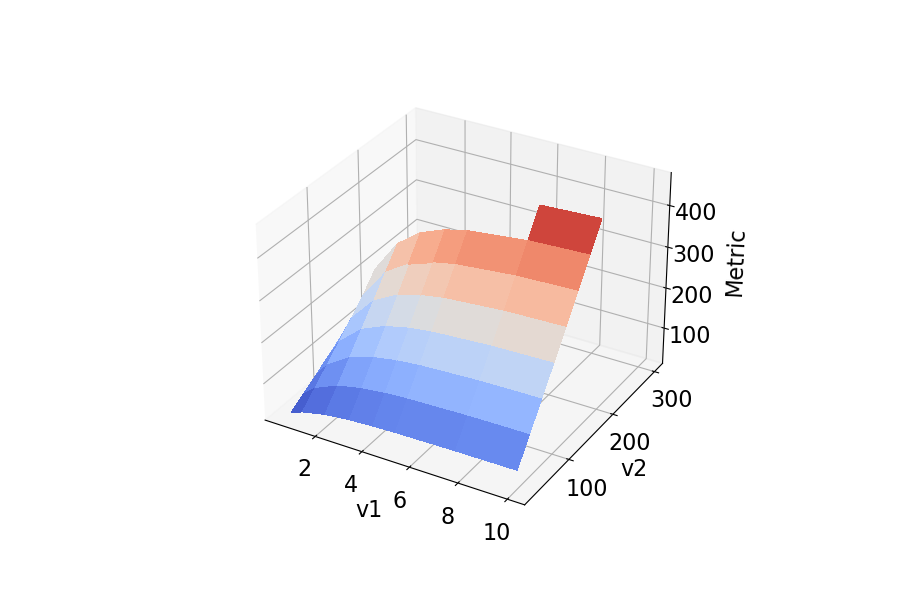

C:\Users\21705319\AppData\Local\Temp/ipykernel_12384/3882207208.py:11: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))


In [4]:
%matplotlib notebook
#%matplotlib inline

plt.rcParams.update({'font.size': 16})

X = np.array(1000*np.array(v1s))
Y = np.array(1000*np.array(v2s))
Z = np.array(DisplacementDiff_LB)*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(9,6))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

<IPython.core.display.Javascript object>


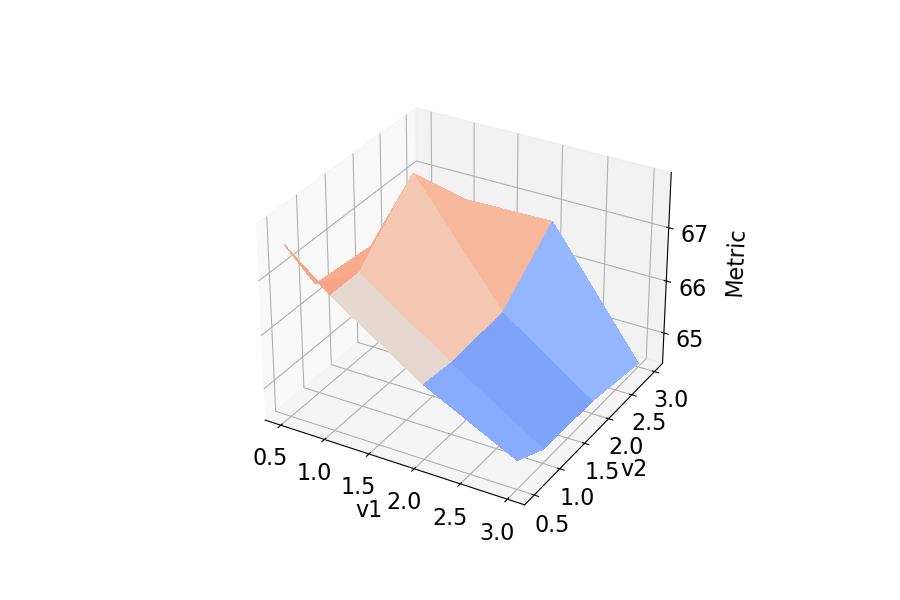

In [20]:
%matplotlib notebook
#%matplotlib inline

plt.rcParams.update({'font.size': 16})

X = np.array(1000*np.array(v1s))
Y = np.array(1000*np.array(v2s))
Z = np.array(StressFWHM_LB)*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(9,6))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

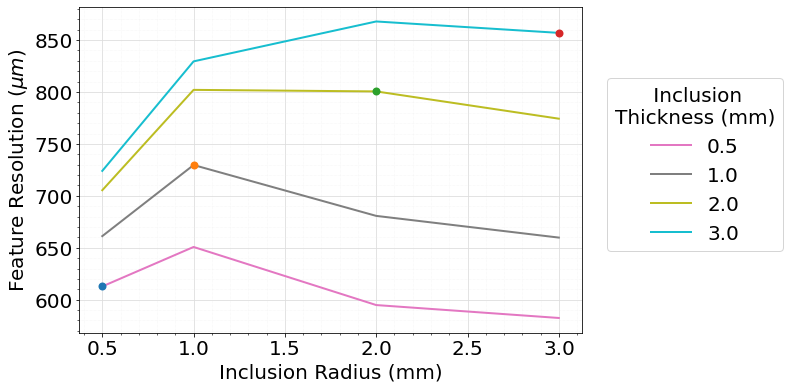

In [30]:
%matplotlib inline

aspect = (9,6)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,6):
    plt.plot([], [], linewidth=2)
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, 1000000*np.array(StressFWHM_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000),zorder=6)
for i in range(0,4):
    plt.scatter(1000*np.array(v2s)[i], 1000000*np.array(StressFWHM_OP)[i,i], linewidth=2,zorder=7)
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Feature Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = (1.05,0.25), title = "      Inclusion \nThickness (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.set_axisbelow(True)
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

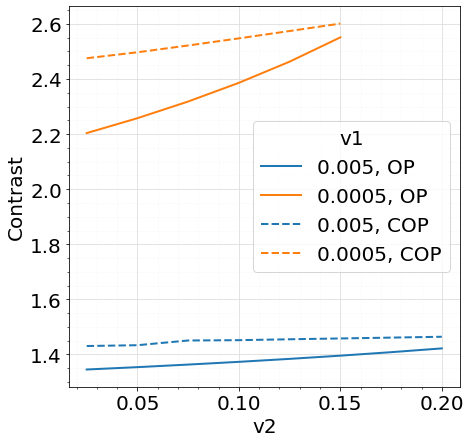

In [51]:
# ID_0p05_IT_3_IR_3_IE_10x_LT_0p5_LE_25kPa_P_20%
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
yrange = [0,300]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in [2,-1]:
    plt.plot(np.array(v2s), np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i]))+", OP")
for i in range(0,8):
    plt.plot([np.nan],[np.nan])
for i in [2,-1]:
    plt.plot(np.array(v2s), np.array(StressContrast_LB)[i,:], linestyle='--', linewidth=2, label=str(np.array(v1s[i]))+", COP")
plt.xlabel("v2")
plt.ylabel("Contrast")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim(yrange)
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "center right", title = "v1", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

In [54]:
(2.2-1.35)/2.2

0.38636363636363635

In [57]:
1.35/2.2

0.6136363636363636

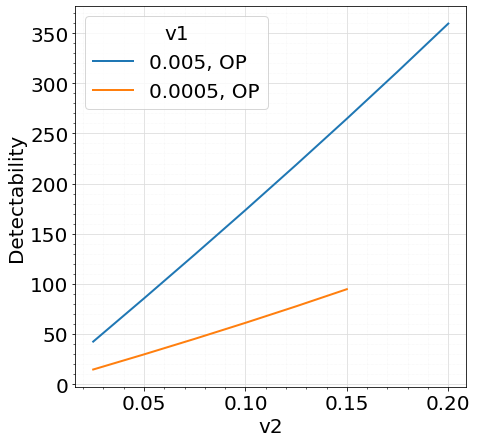

In [52]:
# ID_0p05_IT_3_IR_3_IE_10x_LT_0p5_LE_25kPa_P_20%
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
yrange = [0,300]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in [2,-1]:
    plt.plot(np.array(v2s), 1000000*np.array(DisplacementDiff_LB)[i,:], linewidth=2, label=str(np.array(v1s[i]))+", OP")
plt.xlabel("v2")
plt.ylabel("Detectability")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim(yrange)
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "upper left", title = "v1", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

In [55]:
(265-95)/95

1.7894736842105263

In [56]:
265/95

2.789473684210526

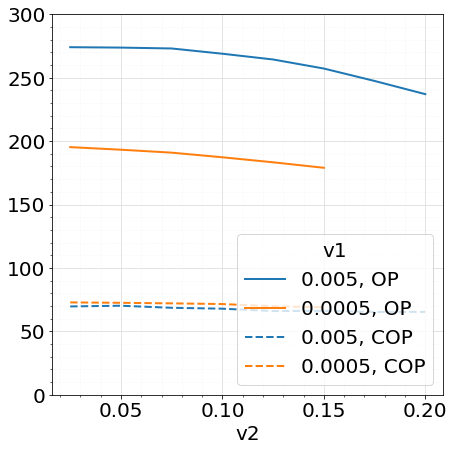

In [59]:
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
yrange = [0,300]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in [2,-1]:
    plt.plot(np.array(v2s), 1000000*np.array(StressFWHM_OP)[i,:], linewidth=2, label=str(np.array(v1s[i]))+", OP")
for i in range(0,8):
    plt.plot([np.nan],[np.nan])
for i in [2,-1]:
    plt.plot(np.array(v2s), 1000000*np.array(StressFWHM_LB)[i,:], linestyle='--', linewidth=2, label=str(np.array(v1s[i]))+", COP")
plt.xlabel("v2")
#plt.ylabel("Resolution")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim(yrange)
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "lower right", title = "v1", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

In [60]:
180/260

0.6923076923076923

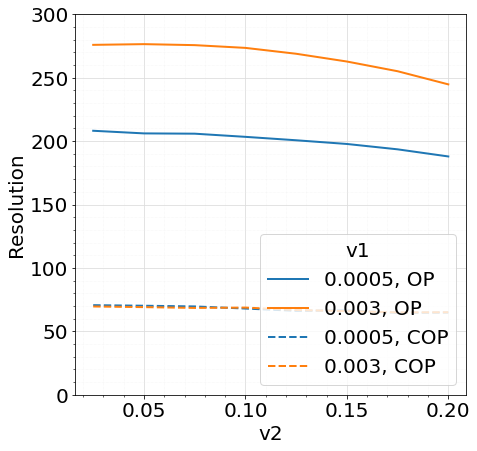

In [33]:
# ID_0p05_IT_3_IR_3_IE_10x_LT_10_LE_25kPa_P_20%
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
yrange = [0,300]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in [0,-1]:
    plt.plot(np.array(v2s), 1000000*np.array(StressFWHM_OP)[i,:], linewidth=2, label=str(np.array(v1s[i]))+", OP")
for i in range(0,8):
    plt.plot([np.nan],[np.nan])
for i in [0,-1]:
    plt.plot(np.array(v2s), 1000000*np.array(StressFWHM_LB)[i,:], linestyle='--', linewidth=2, label=str(np.array(v1s[i]))+", COP")
plt.xlabel("v2")
plt.ylabel("Resolution")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim(yrange)
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "lower right", title = "v1", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

In [34]:
275/70

3.9285714285714284

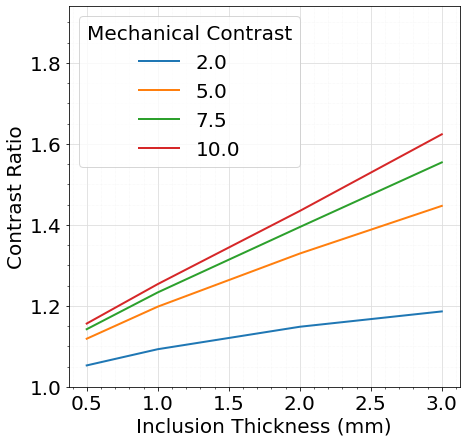

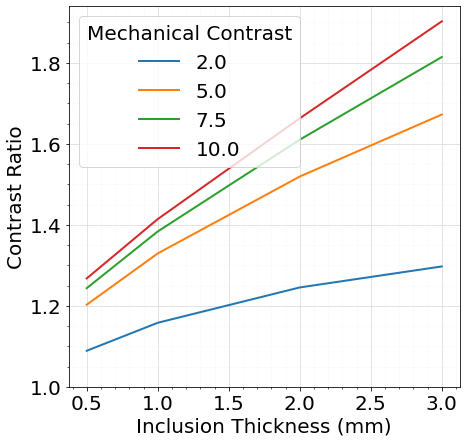

In [90]:
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
yrange = [1,1.94]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i]/25000)))
plt.xlabel("Inclusion Thickness (mm)")
plt.ylabel("Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim(yrange)
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "upper left", title = "Mechanical Contrast", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i]/25000)))
plt.xlabel("Inclusion Thickness (mm)")
plt.ylabel("Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim(yrange)
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "upper left", title = "Mechanical Contrast", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

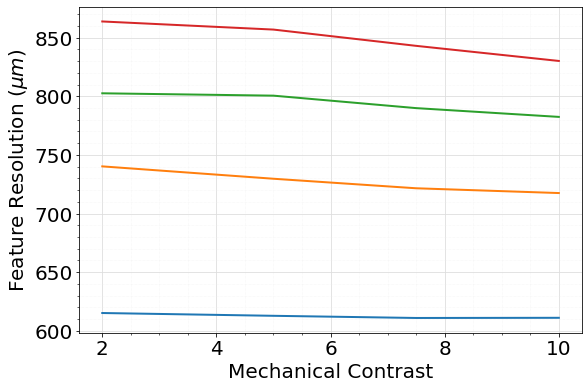

In [38]:
%matplotlib inline

aspect = (9,6)
normalfont = 20
xrange = [1.5,10.5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)/LE[0], 1000000*np.array(StressFWHM_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Mechanical Contrast")
plt.ylabel("Feature Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
#plt.legend(handles, labels, loc = "center right", title = "Inclusion Radius, Thickness (mm)", ncol=2)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

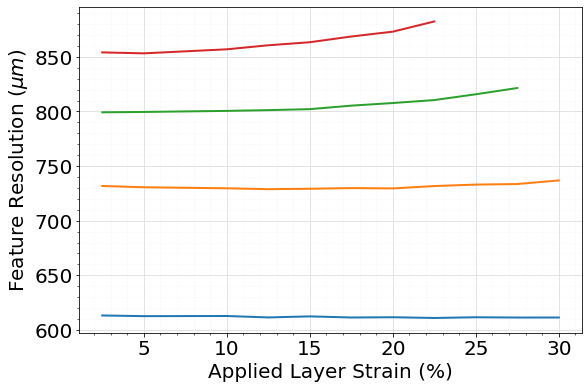

In [11]:
%matplotlib inline

aspect = (9,6)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*100, 1000000*np.array(StressFWHM_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Applied Layer Strain (%)")
plt.ylabel("Feature Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
#plt.legend(handles, labels, loc = "center right", title = "Inclusion Radius, Thickness (mm)", ncol=2)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

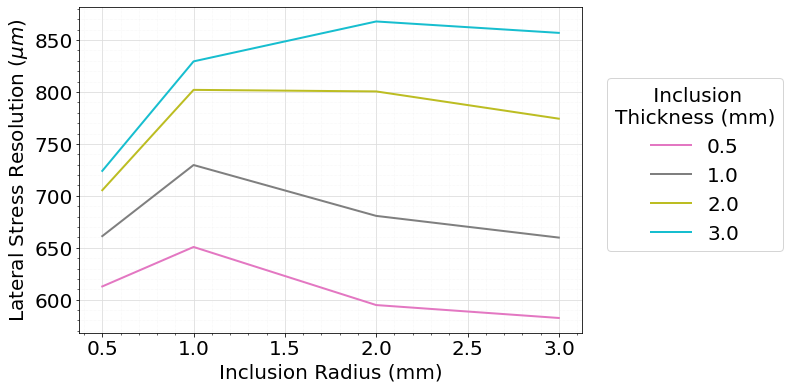

In [81]:
%matplotlib inline

aspect = (9,6)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,6):
    plt.plot([], [], linewidth=2)
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, 1000000*np.array(StressFWHM_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Lateral Stress Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = (1.05,0.25), title = "      Inclusion \nThickness (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

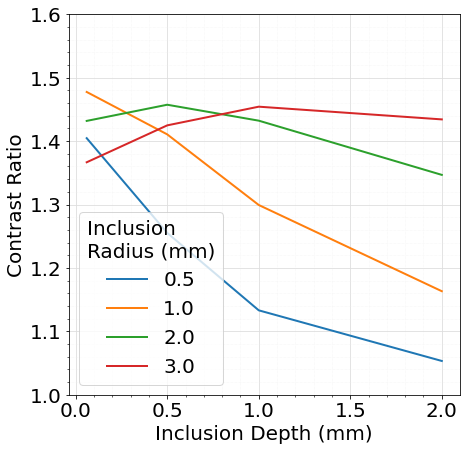

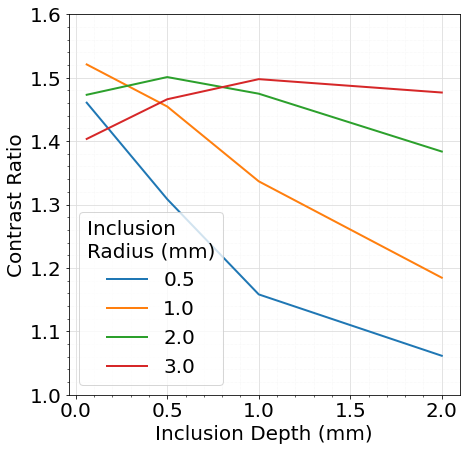

In [26]:
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "lower left", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "lower left", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

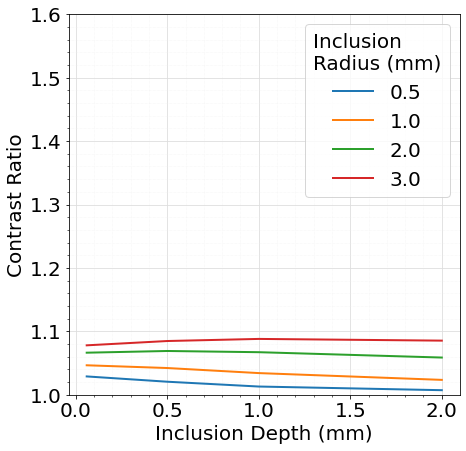

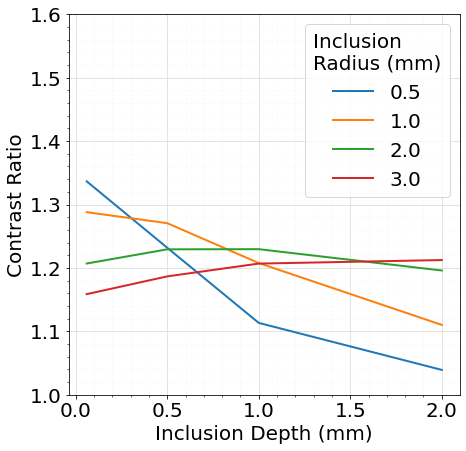

In [28]:
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "upper right", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
plt.ylim([1,1.6])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "upper right", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

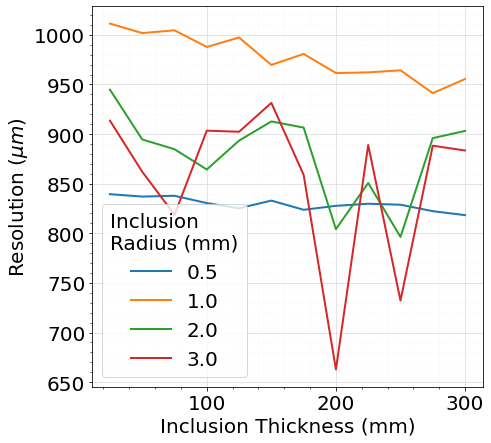

In [16]:
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, 1000000*np.array(StressFWHM_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Thickness (mm)")
plt.ylabel("Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim([1,1.5])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "lower left", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

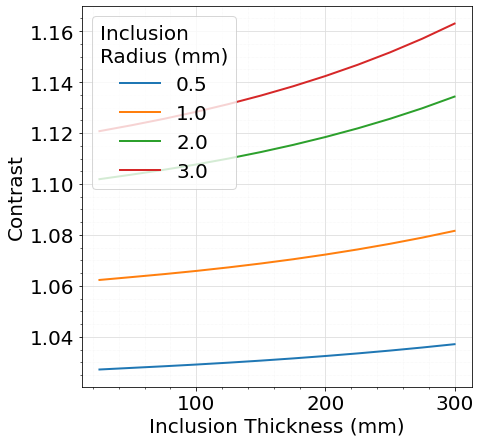

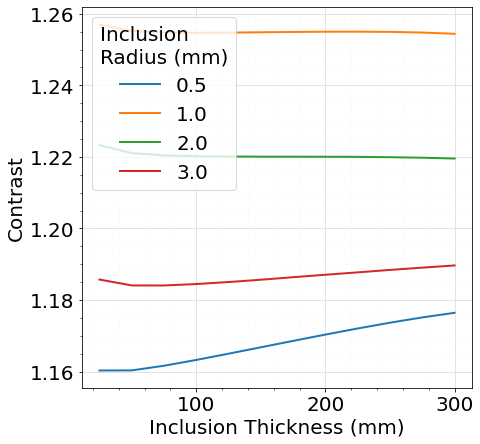

In [17]:
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Thickness (mm)")
plt.ylabel("Contrast")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim([1,1.5])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "upper left", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Thickness (mm)")
plt.ylabel("Contrast")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim(xrange)
#plt.ylim([1,1.5])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "upper left", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
#plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

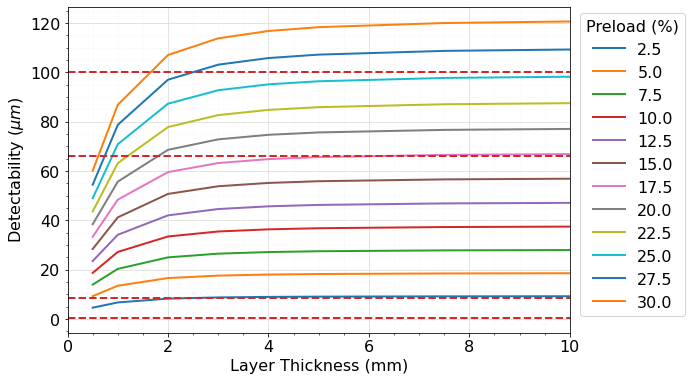

In [377]:
%matplotlib inline

plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 16})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,12,1):
    plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2, label = str(round(v2s[i]*100,3)))

plt.xlabel("Layer Thickness (mm)")
plt.ylabel("Detectability ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.xlim([0,10])
#plt.ylim([1,1.6])
plt.legend(handles, labels, loc = (1.02,0.05), title = "Preload (%)", ncol=1)

plt.plot([0,30], [8.5,8.5], linewidth=2, color='tab:red', linestyle='dashed')
plt.plot([0,30], [0.44,0.44], linewidth=2, color='tab:red', linestyle='dashed')
plt.plot([0,30], [66,66], linewidth=2, color='tab:red', linestyle='dashed')
plt.plot([0,30], [100,100], linewidth=2, color='tab:red', linestyle='dashed')

#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

In [17]:
np.array([0]+list(np.array(v2s)))

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  ])

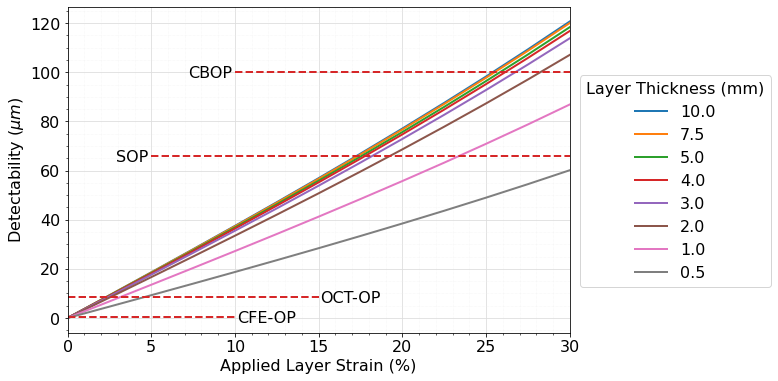

In [4]:
%matplotlib inline

plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 16})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,8):
    plt.plot(np.array([0]+list(np.array(v2s)))*100, np.array([0]+list(np.array(DisplacementDiff_LB)[i,:]))*10**6, linewidth=2, label = str(round(v1s[i]*1000,3)))

plt.xlabel("Applied Layer Strain (%)")
plt.ylabel("Detectability ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.xlim([0,30])
#plt.ylim([1,1.6])
plt.legend(handles, labels, loc = (1.02,0.14), title = "Layer Thickness (mm)", ncol=1)

plt.plot([0,10], [0.44,0.44], linewidth=2, color='tab:red', linestyle='dashed')
plt.text(10.1, 0.44-2.2, r'CFE-OP', fontsize=16)
plt.plot([0,15], [8.5,8.5], linewidth=2, color='tab:red', linestyle='dashed')
plt.text(15.1, 8.5-2.2, r'OCT-OP', fontsize=16)
plt.plot([5,30], [66,66], linewidth=2, color='tab:red', linestyle='dashed')
plt.text(5-2.1, 66-2.2, r'SOP', fontsize=16)
plt.plot([10,30], [100,100], linewidth=2, color='tab:red', linestyle='dashed')
plt.text(10-2.8, 100-2.2, r'CBOP', fontsize=16)

#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

<IPython.core.display.Javascript object>


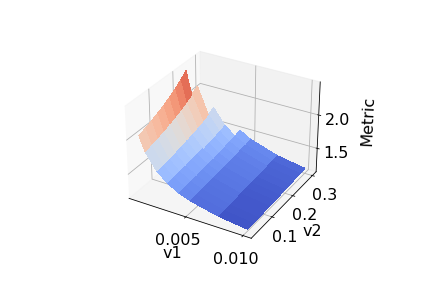

C:\Users\21705319\AppData\Local\Temp/ipykernel_17884/1616124633.py:11: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))


<IPython.core.display.Javascript object>


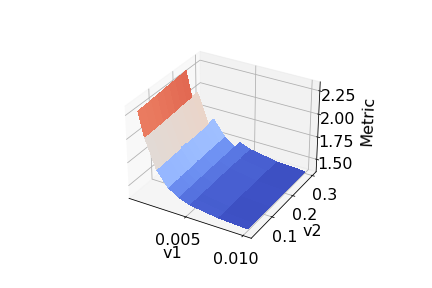

Mesh17-Final_ID_0p5_IT_3_IR_3_IE_5x_LT_0p5_LE_25kPa_P_30%


C:\Users\21705319\AppData\Local\Temp/ipykernel_17884/1616124633.py:23: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))


In [309]:
%matplotlib notebook
#%matplotlib inline

plt.rcParams.update({'font.size': 16})

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressContrast_OP) #*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressContrast_LB) #*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')
print(FrameName)

In [158]:
range(0,3,3)

range(0, 3, 3)

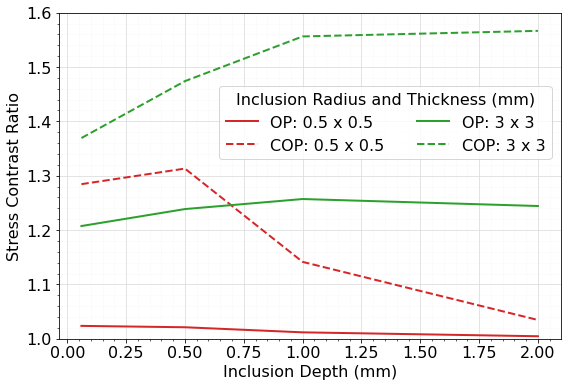

In [182]:
%matplotlib inline

plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 16})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
i=0
plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, color='tab:red', label = "OP: 0.5 x 0.5")
plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, color='tab:red', linestyle='dashed', label = "COP: 0.5 x 0.5")
i=3
plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, color='tab:green', label = "OP: 3 x 3")
plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, linestyle='dashed', color='tab:green', label = "COP: 3 x 3")


plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.6])
plt.legend(handles, labels, loc = (0.32,0.55), title = "Inclusion Radius and Thickness (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

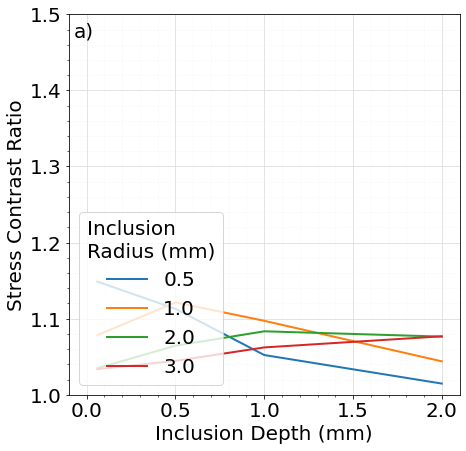

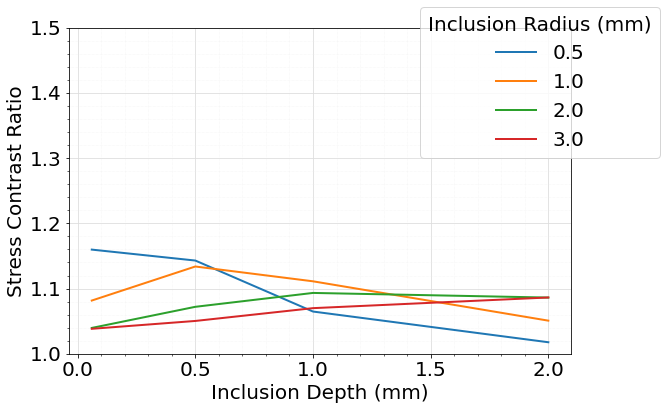

In [425]:
%matplotlib inline

aspect = (7,7)
normalfont = 20
xrange = [-0.25/5*2,2+2*0.25/5]
letterstart = -0.25/5*1.5

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(xrange)
plt.ylim([1,1.5])
plt.rcParams.update({'font.size': normalfont})
plt.legend(handles, labels, loc = "lower left", title = "Inclusion \nRadius (mm)", ncol=1)
plt.rcParams.update({'font.size': normalfont})
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.text(letterstart, 1.47, r'a)', fontsize=20)
plt.show()

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.5])
plt.legend(handles, labels, loc = (0.7,0.6), title = "Inclusion Radius (mm)", ncol=1)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

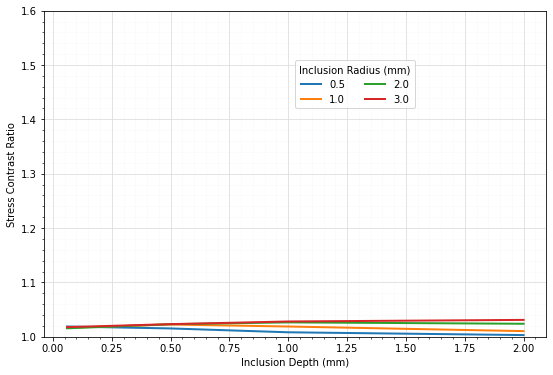

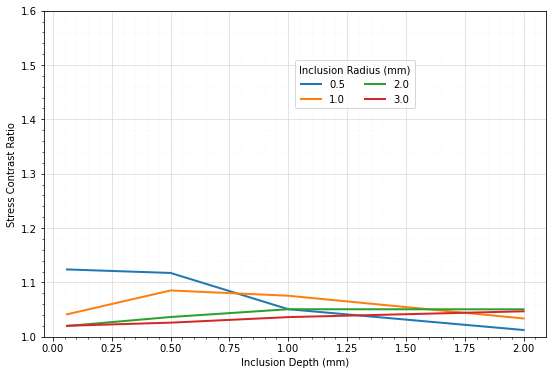

In [427]:
plt.rcParams.update({'font.size': 30})
%matplotlib inline

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.6])
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.6])
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

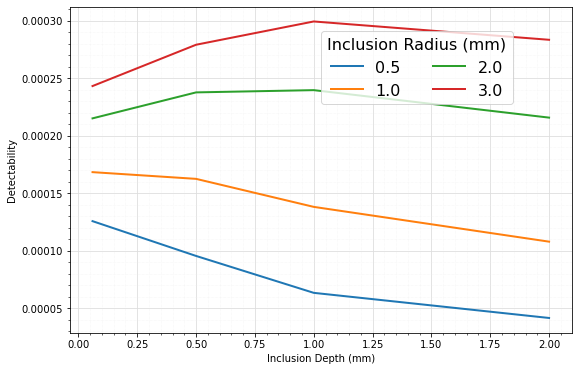

In [134]:
plt.rcParams.update({'font.size': 30})
%matplotlib inline

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(DisplacementDiff_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Detectability")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
#plt.ylim([1,1.6])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

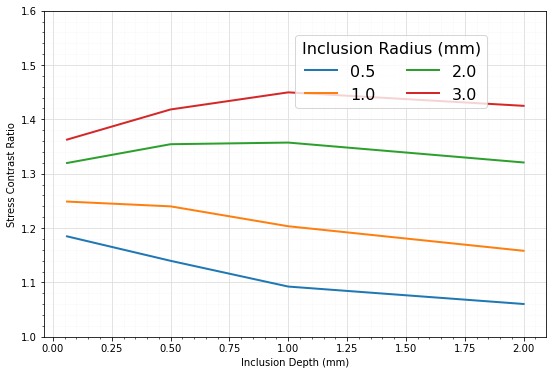

In [132]:
plt.rcParams.update({'font.size': 30})
%matplotlib inline

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.6])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

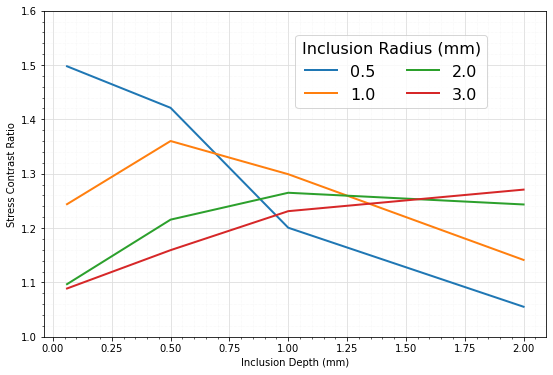

In [77]:
plt.rcParams.update({'font.size': 30})
%matplotlib inline

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.6])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

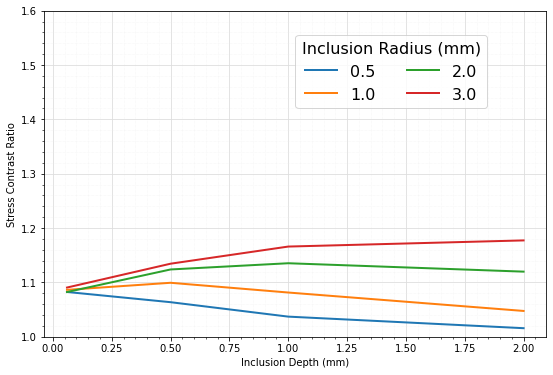

In [78]:
plt.rcParams.update({'font.size': 30})
%matplotlib inline

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.6])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

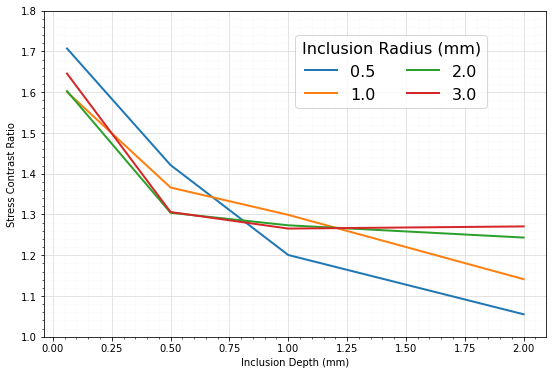

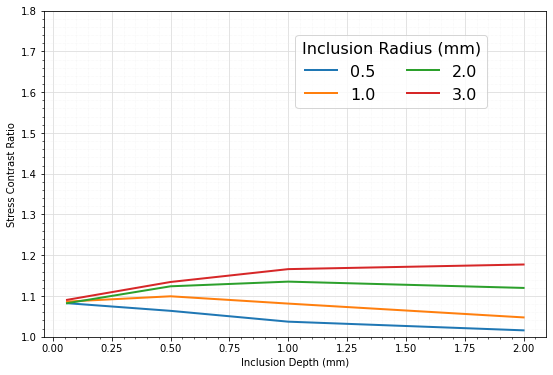

In [83]:
plt.rcParams.update({'font.size': 30})
%matplotlib inline

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressMaxContrast_LB)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.8])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 30})
%matplotlib inline

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(np.array(v1s[i])*1000))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
plt.ylim([1,1.8])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.5,0.7), title = "Inclusion Radius (mm)", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

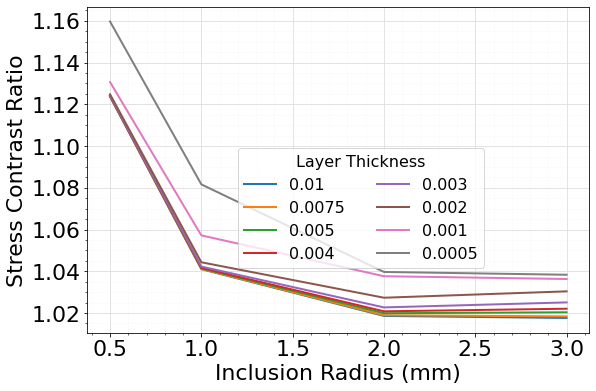

In [8]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, np.array(StressContrast_LB)[:,i], linewidth=2, label=str(v2s[i]))
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([0,2.05])
#plt.ylim([1,3.5])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.3,0.2), title = "Layer Thickness", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

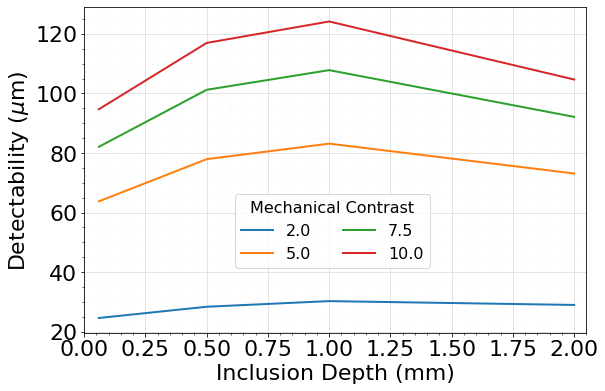

In [53]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*1000000, linewidth=2, label=str(v2s[i]/LE[0]))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Detectability ($\mu$m)")
handles, labels = ax.get_legend_handles_labels()
plt.xlim([0,2.05])
#plt.ylim([1,3.5])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.3,0.2), title = "Mechanical Contrast", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

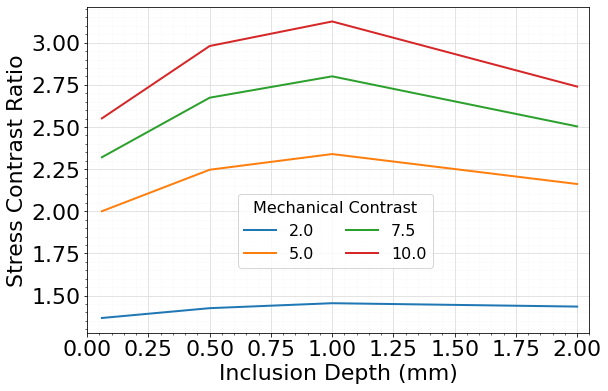

In [55]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, np.array(StressContrast_OP)[:,i], linewidth=2, label=str(v2s[i]/LE[0]))
plt.xlabel("Inclusion Depth (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
plt.xlim([0,2.05])
#plt.ylim([1,3.5])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.3,0.2), title = "Mechanical Contrast", ncol=2)
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

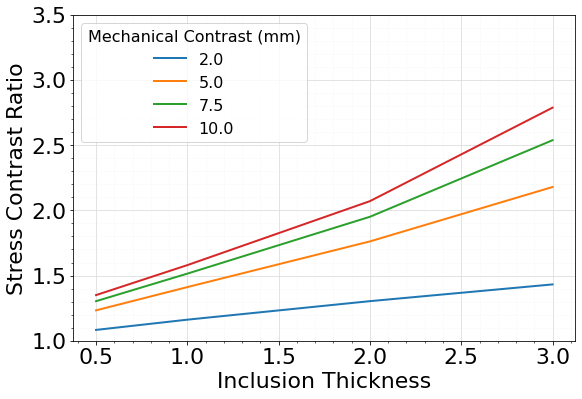

In [33]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(v1s[i]/LE[0]))
plt.xlabel("Inclusion Thickness")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
#plt.xlim([1,11])
plt.ylim([1,3.5])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper left", title = "Mechanical Contrast (mm)")
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

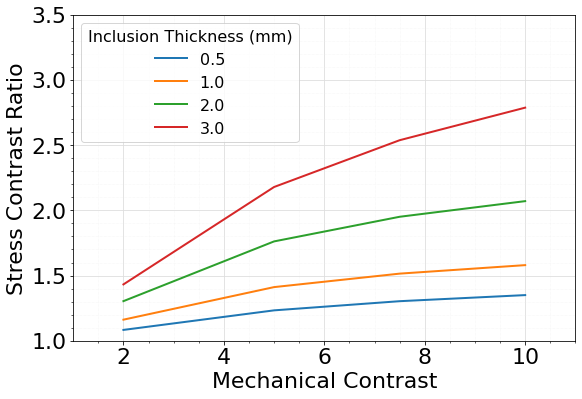

In [30]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)/LE[0], np.array(StressContrast_OP)[:,i], linewidth=2, label=str(v2s[i]*1000))
plt.xlabel("Mechanical Contrast")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
plt.xlim([1,11])
plt.ylim([1,3.5])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper left", title = "Inclusion Thickness (mm)")
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

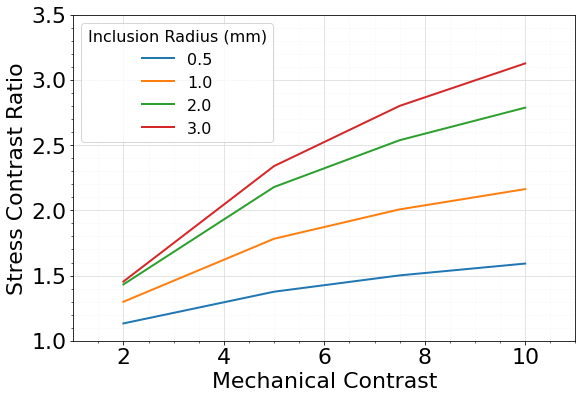

In [28]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)/LE[0], np.array(StressContrast_OP)[:,i], linewidth=2, label=str(v2s[i]*1000))
plt.xlabel("Mechanical Contrast")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
plt.xlim([1,11])
plt.ylim([1,3.5])
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper left", title = "Inclusion Radius (mm)")
#plt.grid()
#ax.xaxis.set_ticks(np.arange(1, 11, 2))
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

ID:  0.001
IT:  0.003
IR:  0.002
IE:  250000


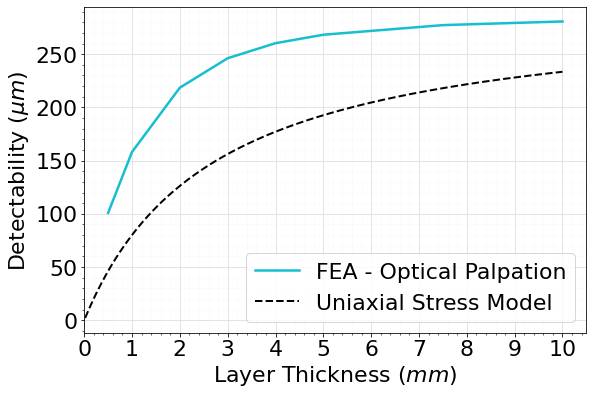

In [15]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),10*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = E*5.0 # Inclusion Elasticity
P = 12.5 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=1
plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2.5, color='tab:cyan' , label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(L0[0:len(root)])*1000, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right" ) #, title = "Sample ")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.xlim([0,10.5])
#plt.ylim([0,200])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

In [4]:
StressFWHM_OP

[[0.0019355973869096487]]

In [5]:
StressFWHM_LB

[[0.0009963598786271182]]

In [6]:
DisplacementDiff_LB

[[0.00013076256535714492]]

In [7]:
StressContrast_LB

[[1.5240209874338022]]

In [8]:
StressContrast_OP

[[1.279883539535103]]

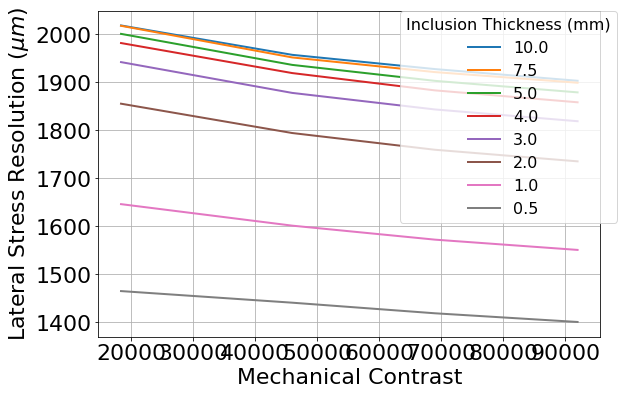

In [4]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)/E, np.array(StressFWHM_OP)[i,:]*10**6, linewidth=2, label=str(v1s[i]*1000))
plt.xlabel("Mechanical Contrast")
plt.ylabel("Lateral Stress Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.6,0.35), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

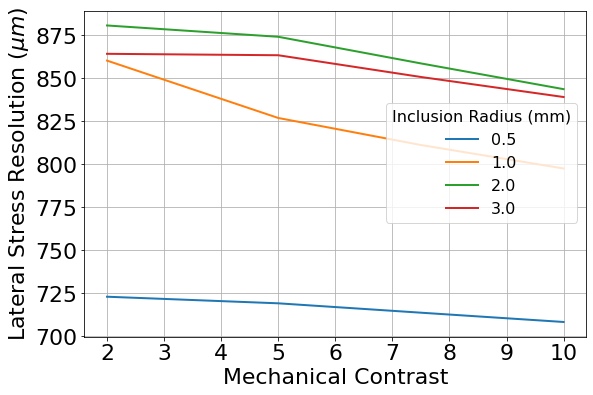

In [43]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)/E, np.array(StressFWHM_OP)[i,:]*10**6, linewidth=2, label=str(v1s[i]*1000))
plt.xlabel("Mechanical Contrast")
plt.ylabel("Lateral Stress Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.6,0.35), title = "Inclusion Radius (mm)")
plt.grid()
plt.show()

ID:  0.002
IT:  0.003
IR:  0.003
IE:  250000
LE Iteration:  837  failed


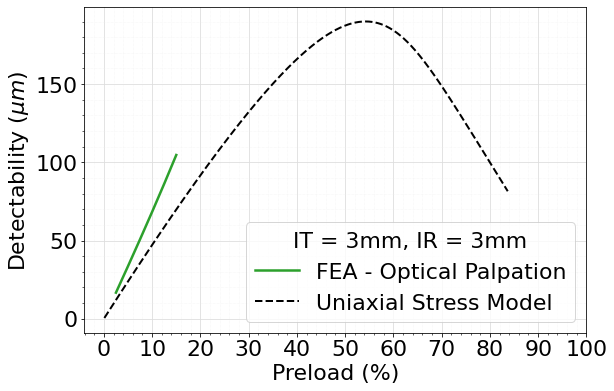

In [25]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Preload
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = np.arange(0.1,100,0.1) /100.0 # Preload, + in compression

root = []
for n in range(0,len(P)):
    def func(x):
        Pn = P[n]
        return ( (L0*(1-Pn)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-Pn)-x)/L0)**(E/Ei) - L0*(1-Pn) - S0*(1-Pn) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P[n])-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P[n])-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.nan,np.nan)
plt.plot(np.nan,np.nan)
plt.plot(np.array(v2s)*100, np.array(DisplacementDiff_LB)[i,:]*10**6, linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(P[0:len(root)])*100, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
plt.plot([0,],np.nan)

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "IT = 3mm, IR = 3mm")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Preload (%)")
ax.xaxis.set_ticks(np.arange(0, 101, 10))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

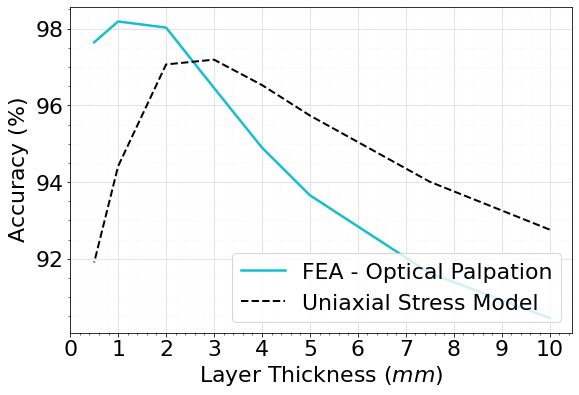

ID:  0.0005
IT:  0.002
IR:  0.002
IE:  50000
P:  0.15


In [16]:
# Accuracy in 1D with Layer Thickness
# 2D single plot
S0 = 0.005 # Initial Sample Thickness
L0 = np.array(v1s) # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.0005 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*2.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0[n]*(1-P)-sol.root)/L0[n])*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=5
plt.plot(np.array(v1s)*1000, np.array(StressContrastRatio_OP)[:,i]*10**2, color='tab:cyan', linewidth=2.5, label = "FEA - Optical Palpation")
plt.plot(np.array(v1s)*1000, (np.asarray(root)/np.array(StressContrast_LB)[:,i])*10**2, color='black', linestyle='dashed', linewidth=2, label = "Uniaxial Stress Model")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right") #, title = "Sample E")
#plt.title("Title")
plt.xlabel("Layer Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Accuracy ($\%$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P)

plt.rcParams.update({'font.size': 12})

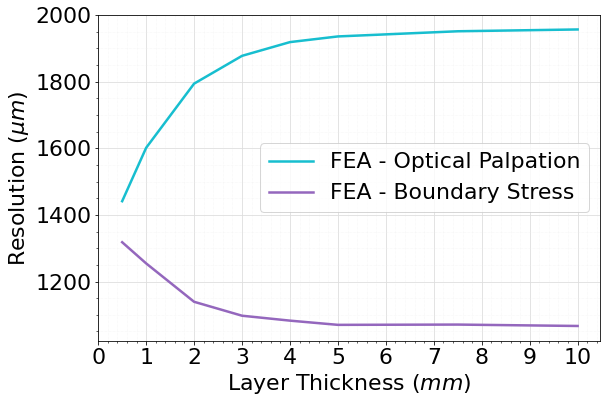

ID:  0.001
IT:  0.003
IR:  0.002
IE:  125000
P:  0.1


In [5]:
# 2D single plot
# Resolution in 1D with layer thickness
%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=0
plt.plot(np.array(v1s)*1000, np.array(StressFWHM_OP)[:,i]*10**6, color='tab:cyan', linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressGaussFWHM_OP)[:,i]*10**6, linewidth=2.5, label = "FEA - OP")
plt.plot(np.array(v1s)*1000, np.array(StressGaussFWHM_LB)[:,i]*10**6, color='tab:purple', linewidth=2.5, label = "FEA - Boundary Stress")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "right") #, title = "Sample B")
#plt.title("Title")
plt.xlabel("Layer Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Resolution ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[i])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P[nP])

plt.rcParams.update({'font.size': 12})

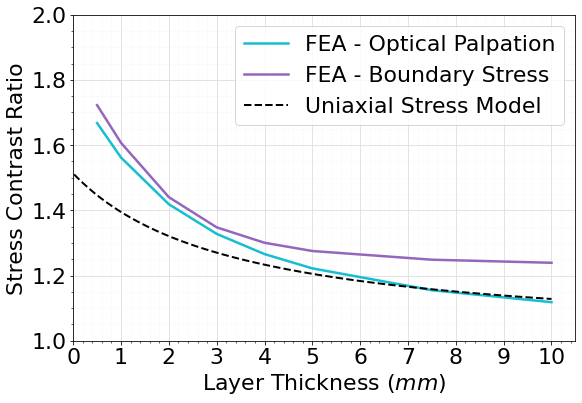

In [12]:
# Contrast Ratio in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),10*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.0005 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*5.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0[n]*(1-P)-sol.root)/L0[n])*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=5
plt.plot(np.array(v1s)*1000, np.array(StressContrast_OP)[:,i], linewidth=2.5, color='tab:cyan', label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(v1s)*1000, np.array(StressContrast_LB)[:,i], linewidth=2.5, color='tab:purple', label = "FEA - Boundary Stress")
plt.plot(np.array(L0[0:len(root)])*1000, np.asarray(root), linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right") #, title = "Sample E")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.ylim([1,2])
plt.xlim([0,10.5])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.001
IT:  0.003
IR:  0.002
IE:  250000


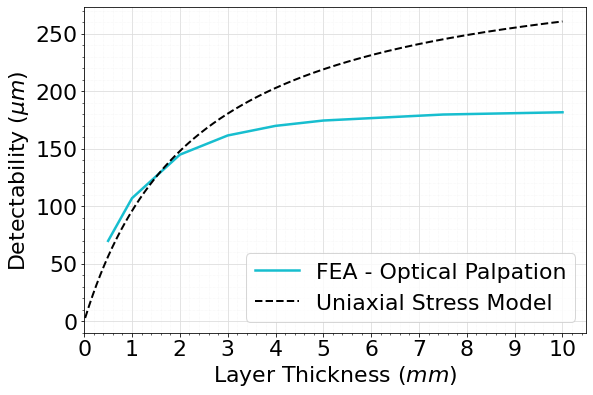

In [10]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),10*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = E*10.0 # Inclusion Elasticity
P = 12.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2.5, color='tab:cyan' , label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(L0[0:len(root)])*1000, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right" ) #, title = "Sample ")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.xlim([0,10.5])
#plt.ylim([0,200])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.002
IT:  0.003
IR:  0.0005
IE:  250000
LE Iteration:  837  failed


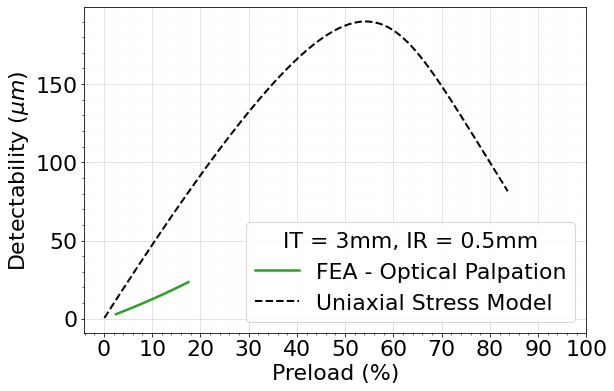

In [22]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Preload
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = np.arange(0.1,100,0.1) /100.0 # Preload, + in compression

root = []
for n in range(0,len(P)):
    def func(x):
        Pn = P[n]
        return ( (L0*(1-Pn)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-Pn)-x)/L0)**(E/Ei) - L0*(1-Pn) - S0*(1-Pn) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P[n])-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P[n])-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.nan,np.nan)
plt.plot(np.nan,np.nan)
plt.plot(np.array(v2s)*100, np.array(DisplacementDiff_LB)[i,:]*10**6, linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(P[0:len(root)])*100, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
plt.plot([0,],np.nan)

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "IT = 3mm, IR = 0.5mm")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Preload (%)")
ax.xaxis.set_ticks(np.arange(0, 101, 10))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

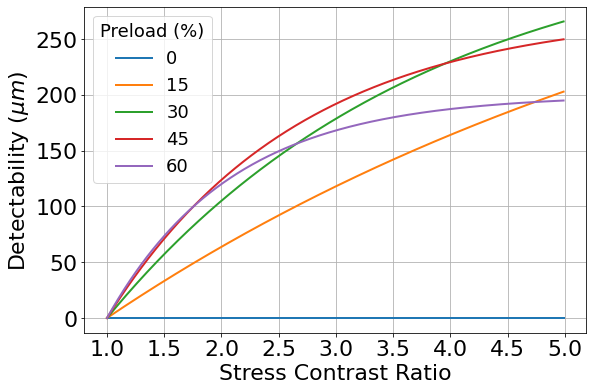

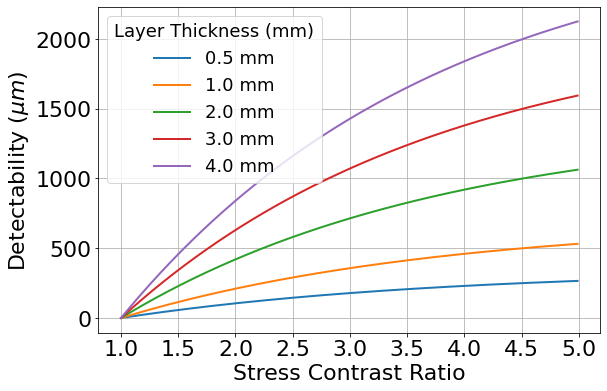

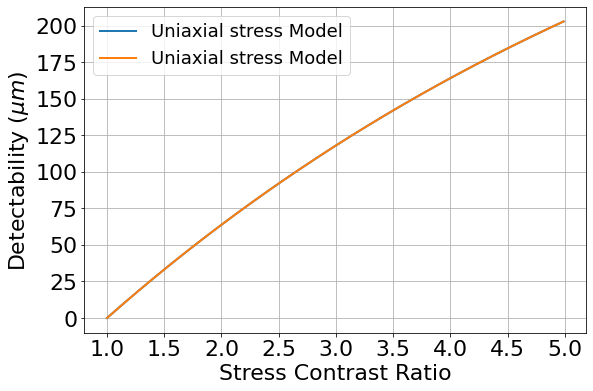

In [7]:
P = 0.01*np.arange(0.0,100.0,15.0)
CR = np.arange(1,5,0.01)
L0 = 0.0005

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
for n in range(0,5):
    Det = L0*(1-P[n]-(1-P[n])**CR)
    plt.plot(CR, Det*10**6, linewidth=2, label=str(int(P[n]*100)) )
handles, labels = ax.get_legend_handles_labels()
plt.xlabel("Stress Contrast Ratio")
plt.ylabel("Detectability ($\mu m$)")
plt.rcParams.update({'font.size': 18})
plt.legend(handles, labels, loc = "upper left", title = "Preload (%)")
plt.grid()
plt.show()

L0 = np.array([0.0005,0.001,0.002,0.003,0.004,0.005,0.0075,0.01])
CR = np.arange(1,5,0.01)
P = 0.3

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
for n in range(0,5):
    Det = L0[n]*(1-P-(1-P)**CR)
    plt.plot(CR, Det*10**6, linewidth=2, label=str(L0[n]*1000)+" mm" )
handles, labels = ax.get_legend_handles_labels()
plt.xlabel("Stress Contrast Ratio")
plt.ylabel("Detectability ($\mu m$)")
plt.rcParams.update({'font.size': 18})
plt.legend(handles, labels, loc = "upper left", title = "Layer Thickness (mm)")
plt.grid()
plt.show()


L0 = 0.0005
CR = np.arange(1,5,0.01)
P = 0.15

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
Det = L0*(1-P-(1-P)**CR)
plt.plot(CR, Det*10**6, linewidth=2, label="Uniaxial stress Model" )
plt.plot(StressContrast_OP, Det*10**6, linewidth=2, label="Uniaxial stress Model" )
handles, labels = ax.get_legend_handles_labels()
plt.xlabel("Stress Contrast Ratio")
plt.ylabel("Detectability ($\mu m$)")
plt.rcParams.update({'font.size': 18})
plt.legend(handles, labels, loc = "upper left")
plt.grid()
plt.show()

ID:  0.0005
IT:  0.0005
IR:  0.003
IE:  250000
LE Iteration:  979  failed


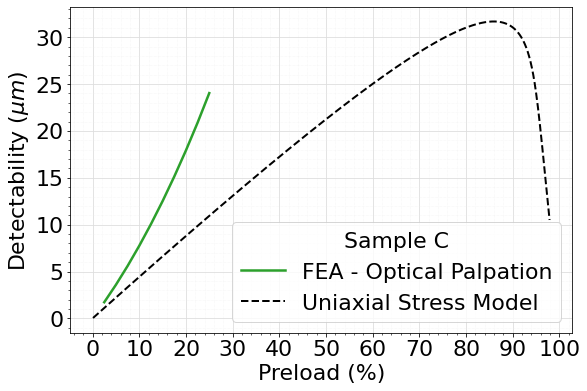

In [7]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Preload
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.0005 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10 *10.0**3.0 # Inclusion Elasticity
P = np.arange(0.1,100,0.1) /100.0 # Preload, + in compression

root = []
for n in range(0,len(P)):
    def func(x):
        Pn = P[n]
        return ( (L0*(1-Pn)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-Pn)-x)/L0)**(E/Ei) - L0*(1-Pn) - S0*(1-Pn) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P[n])-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P[n])-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.nan,np.nan)
plt.plot(np.nan,np.nan)
plt.plot(np.array(v2s)*100, np.array(DisplacementDiff_LB)[i,:]*10**6, linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(P[0:len(root)])*100, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
plt.plot([0,],np.nan)

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Sample C")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Preload (%)")
ax.xaxis.set_ticks(np.arange(0, 101, 10))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

In [84]:
det_root

[]

In [107]:
con_root[0]

1.0965518726177719

In [135]:
v1s

[0.0005, 0.001, 0.002, 0.003]

In [136]:
acc_root

[1.2135464005225642, 1.541279823689452, 2.104385553075708]

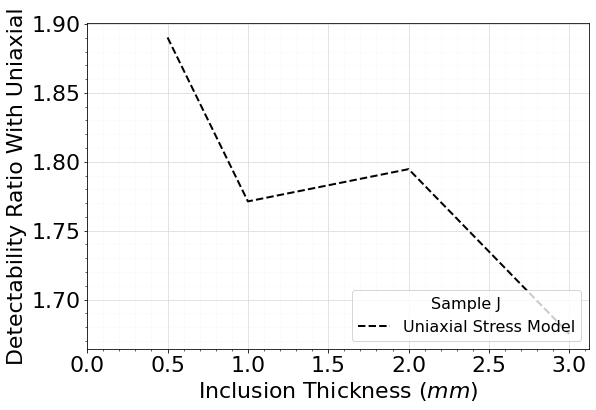

In [159]:
%matplotlib inline

# Detectability in 1D with inclusion thickness
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = np.asarray(v1s) # Initial Inclusion Thickness
S10 = 0.0005 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

det_root = []
con_root = []
acc_root = []
for n in range(0,len(I0)):
    def func(x):
        I0n = I0[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20n/L0) + I0n*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        break
    det_root.append(sol.root)
    con_root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if (I0[n] == 0.0005 or I0[n] == 0.001 or I0[n] == 0.002 or I0[n] == 0.003):
        acc_root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot(np.array(I0[0:len(det_root)])*1000, np.array(DisplacementDiff_LB)[:,i] /np.asarray(det_root), color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")
i=3
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2.5, color="tab:red", label = "FEA - Optical Palpation")
handles, labels = ax.get_legend_handles_labels()
#plt.title("Detec")
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
plt.ylabel("Detectability Ratio With Uniaxial")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "lower right", title="Sample J")
plt.show()

In [162]:
S20

array([ 0.0044,  0.0043,  0.0042,  0.0041,  0.004 ,  0.0039,  0.0038,
        0.0037,  0.0036,  0.0035,  0.0034,  0.0033,  0.0032,  0.0031,
        0.003 ,  0.0029,  0.0028,  0.0027,  0.0026,  0.0025,  0.0024,
        0.0023,  0.0022,  0.0021,  0.002 ,  0.0019,  0.0018,  0.0017,
        0.0016,  0.0015,  0.0014,  0.0013,  0.0012,  0.0011,  0.001 ,
        0.0009,  0.0008,  0.0007,  0.0006,  0.0005,  0.0004,  0.0003,
        0.0002,  0.0001,  0.    , -0.0001, -0.0002, -0.0003, -0.0004,
       -0.0005, -0.0006, -0.0007, -0.0008, -0.0009])

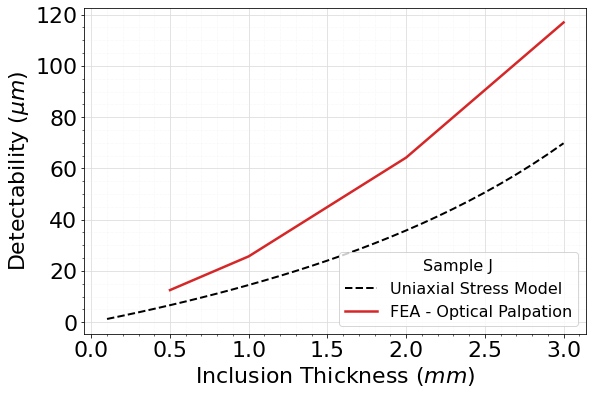

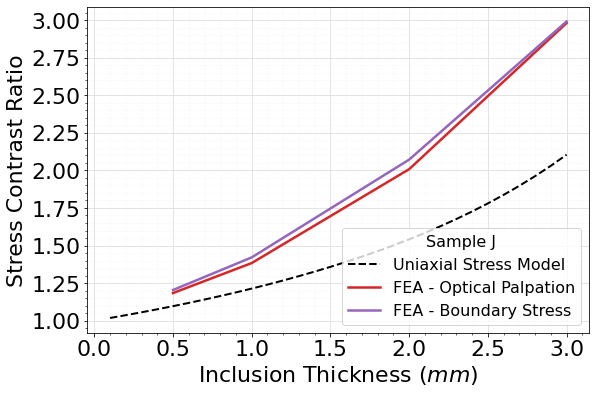

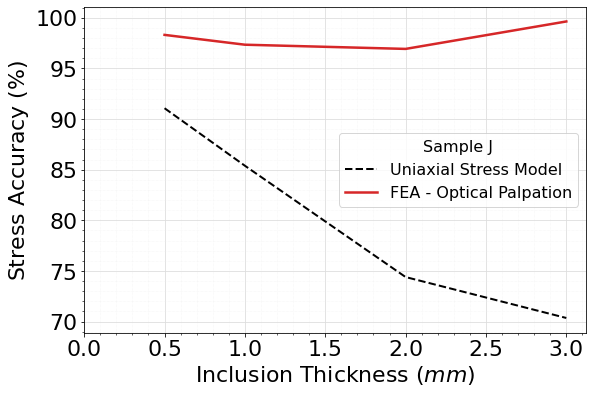

In [163]:
%matplotlib inline

# Detectability in 1D with inclusion thickness
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = np.arange(0.0001,0.0031,0.0001) # Initial Inclusion Thickness
S10 = 0.0005 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

det_root = []
con_root = []
acc_root = []
for n in range(0,len(I0)):
    def func(x):
        I0n = I0[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20n/L0) + I0n*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        break
    det_root.append(sol.root)
    con_root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if (I0[n] == 0.0005 or I0[n] == 0.001 or I0[n] == 0.002 or I0[n] == 0.003):
        acc_root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
        
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot(np.array(I0[0:len(det_root)])*1000, np.asarray(det_root)*10**6, color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")
i=3
plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2.5, color="tab:red", label = "FEA - Optical Palpation")
handles, labels = ax.get_legend_handles_labels()
#plt.title("Detec")
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
plt.ylabel("Detectability ($\mu m$)")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "lower right", title="Sample J")
plt.show()

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot(np.array(I0[0:len(con_root)])*1000, np.asarray(con_root), color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")
i=3
plt.plot(np.array(v1s)*1000, np.array(StressContrast_OP)[:,i], color="tab:red", linewidth=2.5, label = "FEA - Optical Palpation")
plt.plot(np.array(v1s)*1000, np.array(StressContrast_LB)[:,i], color="tab:purple", linewidth=2.5, label = "FEA - Boundary Stress")
handles, labels = ax.get_legend_handles_labels()
#plt.title("Detec")
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
plt.ylabel("Stress Contrast Ratio")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "lower right", title="Sample J")
plt.show()

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, (1-np.abs(1-(np.asarray(acc_root)/np.array(StressContrast_LB)[:,i])))*10**2, color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")
plt.plot(np.array(v1s)*1000, (1-np.abs(1-np.array(StressContrastRatio_OP)[:,i]))*10**2, color="tab:red", linewidth=2.5, label = "FEA - Optical Palpation")
handles, labels = ax.get_legend_handles_labels()
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
plt.ylabel("Stress Accuracy ($\%$)")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "center right", title="Sample J")
plt.show()

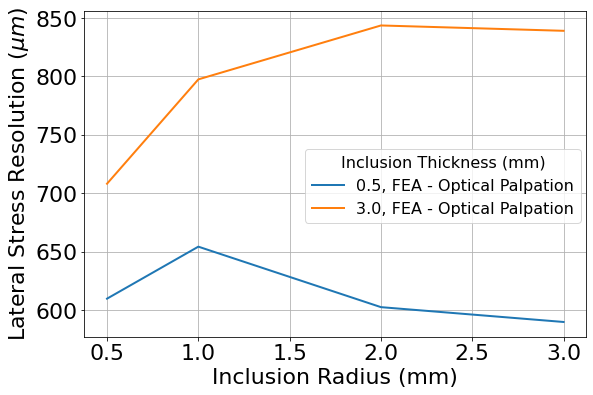

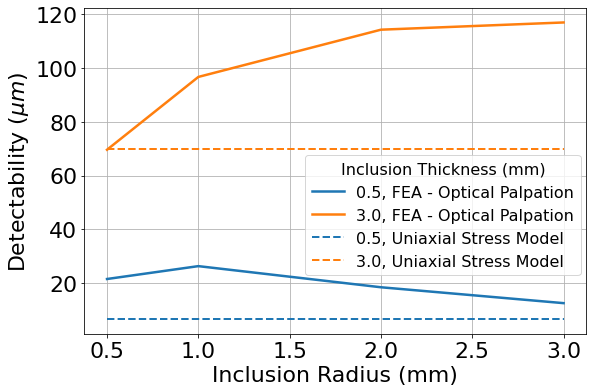

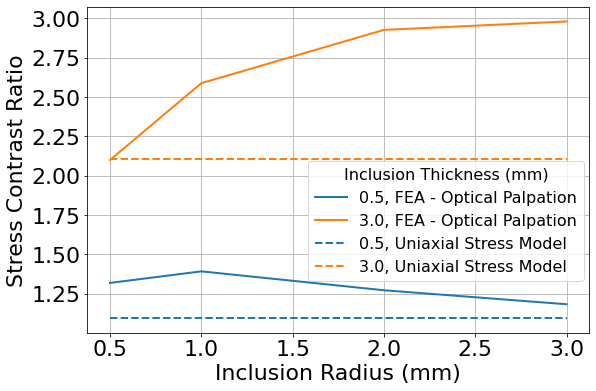

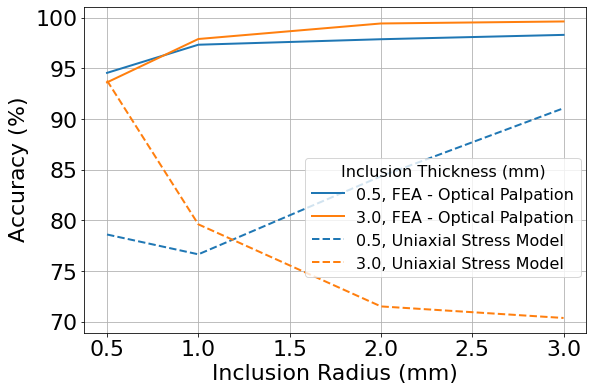

In [115]:
%matplotlib inline
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = np.asarray(v1s) # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

det_root = []
con_root = []
for n in range(0,len(I0)):
    def func(x):
        I0n = I0[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20n/L0) + I0n*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        break
    det_root.append(sol.root)
    con_root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))

# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
for i in [0,3]:
    plt.plot(np.array(v2s)*1000, np.array(StressFWHM_OP)[i,:]*10**6, linewidth=2, label=str(v1s[i]*1000)+", FEA - Optical Palpation")

plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Lateral Stress Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.44,0.35), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

# Detectability in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
for i in [0,3]:
    plt.plot(np.array(v2s)*1000, np.array(DisplacementDiff_LB)[i,:]*10**6, linewidth=2.5, label=str(v1s[i]*1000)+", FEA - Optical Palpation")
plt.gca().set_prop_cycle(None)
for i in [0,3]:
    plt.plot(np.asarray([v2s[0],v2s[-1]])*1000, np.asarray([det_root[i],det_root[i]])*10**6, linestyle='dashed', linewidth=2, label=str(v1s[i]*1000)+", Uniaxial Stress Model")
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Detectability ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.44,0.18), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

# Contrast in 1D with I0
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
for i in [0,3]:
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(v1s[i]*1000)+", FEA - Optical Palpation")
plt.gca().set_prop_cycle(None)
for i in [0,3]:
    plt.plot(np.asarray([v2s[0],v2s[-1]])*1000, np.asarray([con_root[i],con_root[i]]), linestyle='dashed', linewidth=2, label=str(v1s[i]*1000)+", Uniaxial Stress Model")
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.44,0.16), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

# Accuracy in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in [0,3]:
    plt.plot(np.array(v2s)*1000, np.array(StressContrastRatio_OP)[i,:]*10**2, linewidth=2, label=str(v1s[i]*1000)+", FEA - Optical Palpation")
plt.gca().set_prop_cycle(None)
for i in [0,3]:
    plt.plot(np.array(v2s)*1000, (1-np.abs(1-con_root[i]/np.array(StressContrast_LB)[i,:]))*10**2, linestyle='dashed', linewidth=2, label=str(v1s[i]*1000)+", Uniaxial Stress Model")
#(1-np.abs(1-(np.asarray(root)/np.array(StressContrast_LB)[:,i])))*10**2
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Accuracy ($\%$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.44,0.17), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

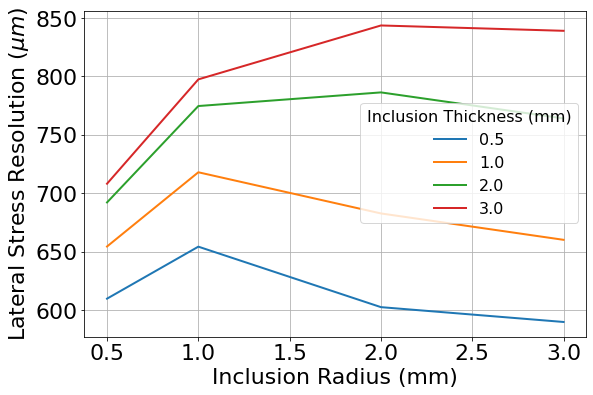

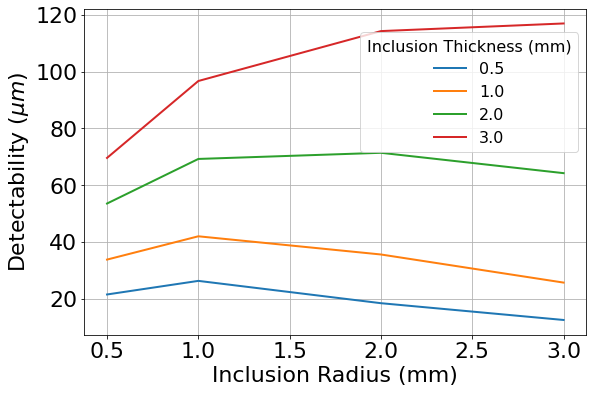

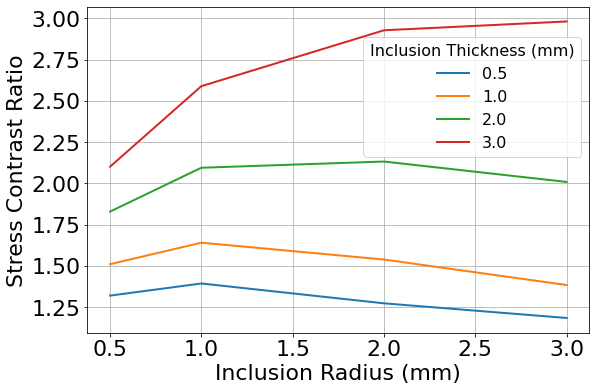

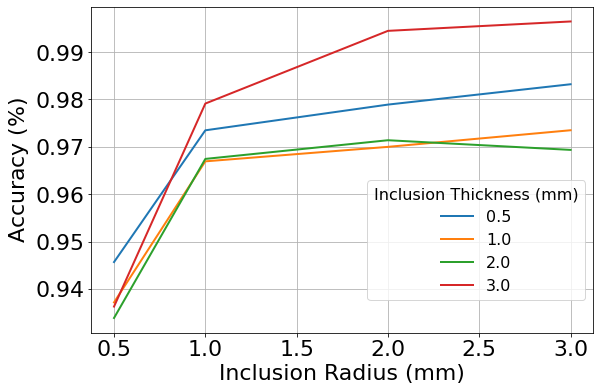

In [27]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressFWHM_OP)[i,:]*10**6, linewidth=2, label=str(v1s[i]*1000))
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Lateral Stress Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.55,0.35), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

# Detectability in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(DisplacementDiff_LB)[i,:]*10**6, linewidth=2, label=str(v1s[i]*1000))
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Detectability ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.55,0.56), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

# Contrast in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrast_OP)[i,:], linewidth=2, label=str(v1s[i]*1000))
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Stress Contrast Ratio")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.55,0.54), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

# Accuracy in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(v2s)*1000, np.array(StressContrastRatio_OP)[i,:], linewidth=2, label=str(v1s[i]*1000))
plt.xlabel("Inclusion Radius (mm)")
plt.ylabel("Accuracy ($\%$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.55,0.1), title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

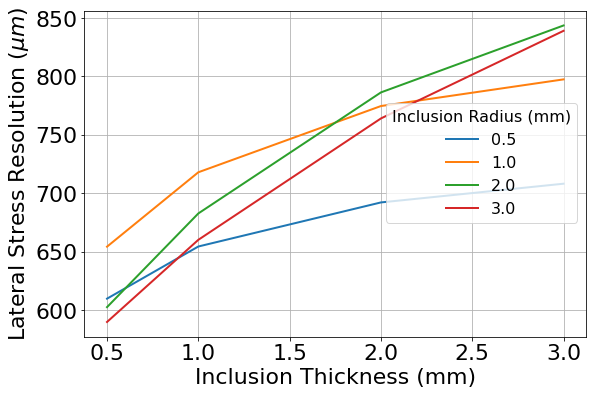

In [29]:
# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, np.array(StressFWHM_OP)[:,i]*10**6, linewidth=2, label=str(v2s[i]*1000))
plt.xlabel("Inclusion Thickness (mm)")
plt.ylabel("Lateral Stress Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = (0.6,0.35), title = "Inclusion Radius (mm)")
plt.grid()
plt.show()

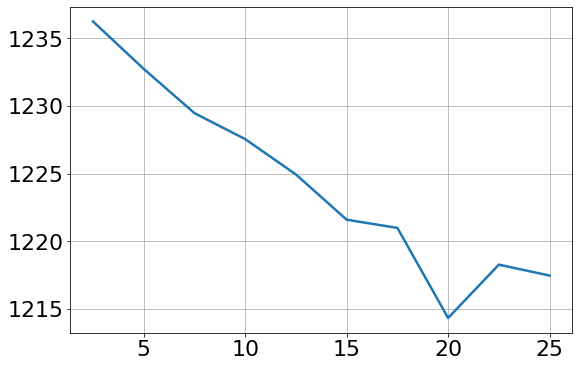

ID:  0.001
IT:  0.002
IR:  0.001
IE:  187500.0
P:  0.05


In [20]:
# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=1
plt.plot(np.array(v1s)*100, np.array(StressFWHM_OP)[:,i]*10**6, linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressGaussFWHM_OP)[:,i]*10**6, linewidth=2.5, label = "FEA - OP")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.grid()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[i])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P[i])

plt.rcParams.update({'font.size': 12})

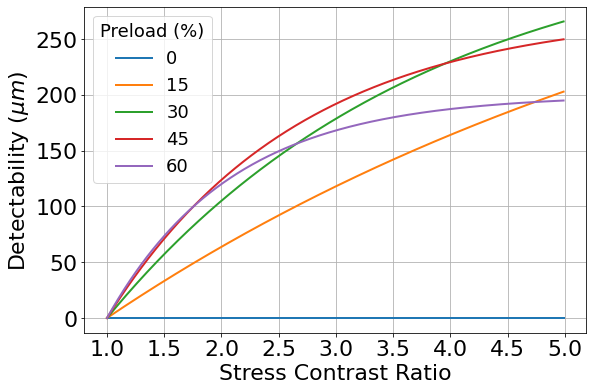

In [154]:
P = 0.01*np.arange(0.0,100.0,15.0)
CR = np.arange(1,5,0.01)
L0 = 0.0005

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
for n in range(0,5):
    Det = L0*(1-P[n]-(1-P[n])**CR)
    plt.plot(CR, Det*10**6, linewidth=2, label=str(int(P[n]*100)) )
handles, labels = ax.get_legend_handles_labels()
plt.xlabel("Stress Contrast Ratio")
plt.ylabel("Detectability ($\mu m$)")
plt.rcParams.update({'font.size': 18})
plt.legend(handles, labels, loc = "upper left", title = "Preload (%)")
plt.grid()
plt.show()

In [46]:
AR = [] # for IT and IR
for i in range(0,len(v1s)):
    for j in range(0,len(v2s)):
        if j==0:
            AR.append([v2s[j]/v1s[i]])
        else:
            AR[-1].append(v2s[j]/v1s[i])
print(AR)
flatten(AR)

[[1.0, 2.0, 4.0, 6.0], [0.5, 1.0, 2.0, 3.0], [0.25, 0.5, 1.0, 1.5], [0.16666666666666666, 0.3333333333333333, 0.6666666666666666, 1.0]]


[1.0,
 2.0,
 4.0,
 6.0,
 0.5,
 1.0,
 2.0,
 3.0,
 0.25,
 0.5,
 1.0,
 1.5,
 0.16666666666666666,
 0.3333333333333333,
 0.6666666666666666,
 1.0]

<IPython.core.display.Javascript object>


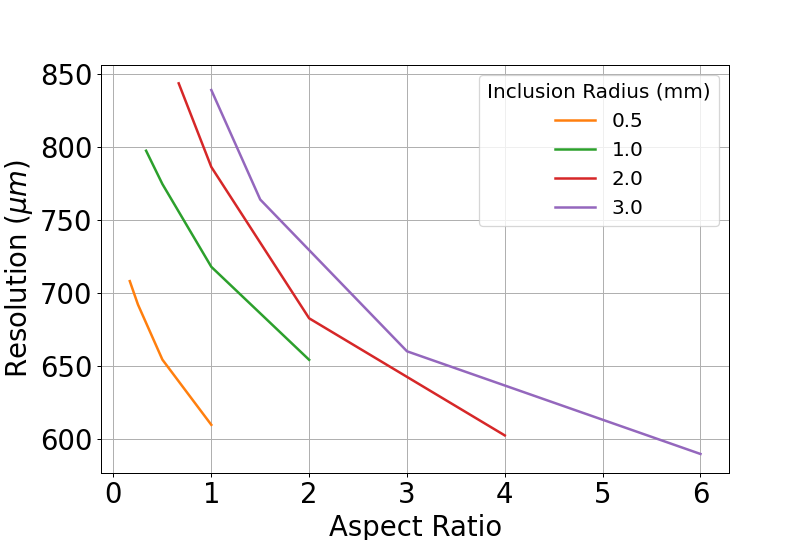

<IPython.core.display.Javascript object>


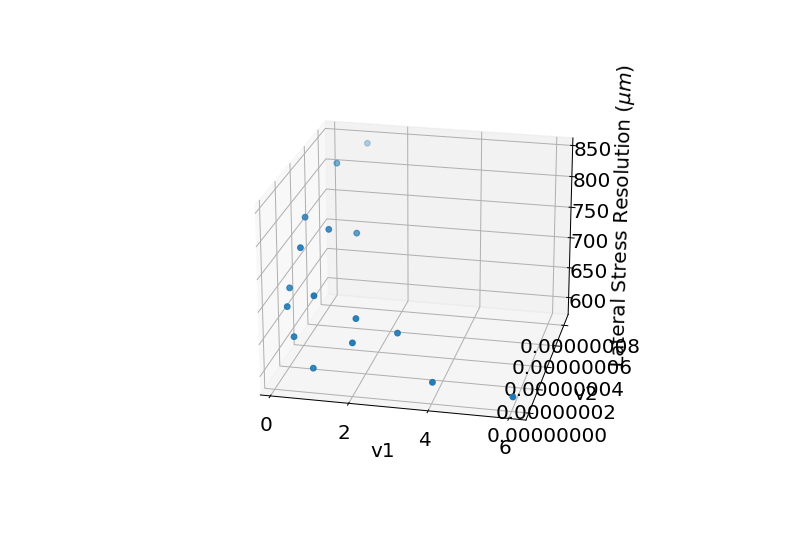

In [78]:
# Aspect Ratio
%matplotlib notebook
AR = [] # for IT and IR
V = []
for i in range(0,len(v1s)):
    for j in range(0,len(v2s)):
        if j==0:
            AR.append([v2s[j]/v1s[i]])
            V.append([v2s[j]*v1s[i]**2*np.pi])
        else:
            AR[-1].append(v2s[j]/v1s[i])
            V[-1].append(v2s[j]*v1s[i]**2*np.pi)

# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(AR)[:,i], np.array(StressFWHM_OP)[:,i]*10**6, linewidth=2, label=str(v2s[i]*1000))
plt.xlabel("Aspect Ratio")
plt.ylabel("Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper right", title = "Inclusion Radius (mm)")
plt.grid()
plt.show()

X = np.array(flatten(AR))
Y = np.array(flatten(V))
Z = np.array(flatten(StressFWHM_OP))*10**6
#Y, X = np.meshgrid(Y, X)
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d')
surf = ax.scatter(X, Y, Z)#, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Lateral Stress Resolution ($\mu m$)', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

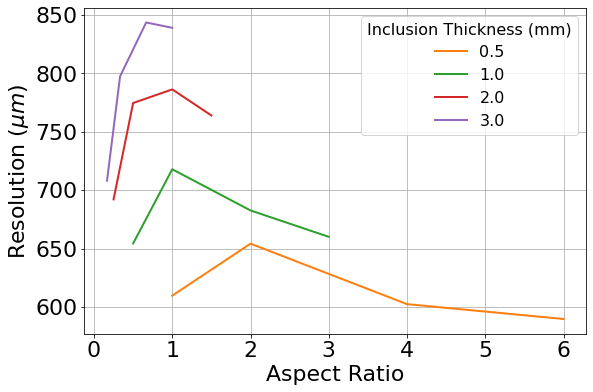

In [56]:
# Aspect Ratio
%matplotlib inline
AR = [] # for IT and IR
for i in range(0,len(v1s)):
    for j in range(0,len(v2s)):
        if j==0:
            AR.append([v2s[j]/v1s[i]])
        else:
            AR[-1].append(v2s[j]/v1s[i])


# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot([np.nan],[np.nan])
for i in range(0,len(v1s)):
    plt.plot(np.array(AR)[i,:], np.array(StressFWHM_OP)[i,:]*10**6, linewidth=2, label=str(v2s[i]*1000))
plt.xlabel("Aspect Ratio")
plt.ylabel("Resolution ($\mu m$)")
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper right", title = "Inclusion Thickness (mm)")
plt.grid()
plt.show()

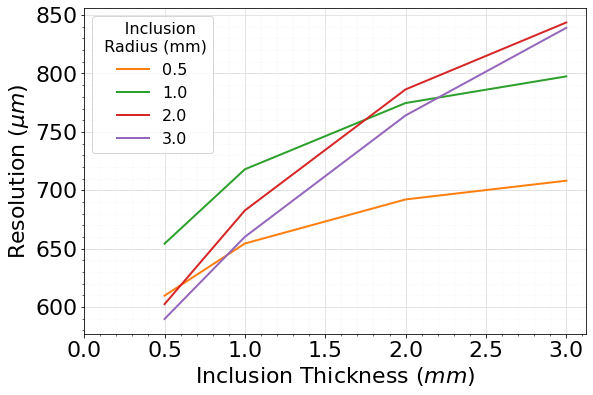

In [33]:
# 2D single plot

%matplotlib inline

# Resolution in 1D with I0
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
#plt.plot(np.array(v1s)*1000, StressFWHM_OP[:,0]*10**2, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
plt.plot([np.nan],[np.nan])
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, np.array(StressFWHM_OP)[:,i]*10**6, linewidth=2, label = str(v2s[i]*1000))
handles, labels = ax.get_legend_handles_labels()
#plt.title("Detec")
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Resolution ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper left", title = "     Inclusion \n Radius (mm)")
plt.show()

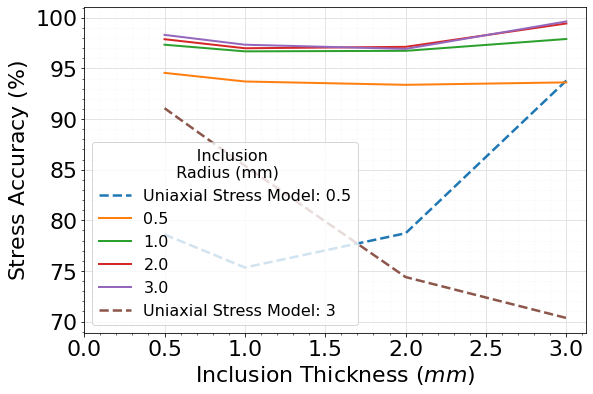

In [41]:
# 2D single plot

%matplotlib inline

# Accuracy in 1D with I0
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = np.array([0.0005,0.001,0.002,0.003]) # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(I0)):
    def func(x):
        I0n = I0[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20n/L0) + I0n*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot(np.array(v1s)*1000, (1-np.abs(1-(np.asarray(root)/np.array(StressContrast_LB)[:,0])))*10**2, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model: 0.5")
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, (1-np.abs(1-np.array(StressContrastRatio_OP)[:,i]))*10**2, linewidth=2, label = str(v2s[i]*1000))
plt.plot(np.array(v1s)*1000, (1-np.abs(1-(np.asarray(root)/np.array(StressContrast_LB)[:,3])))*10**2, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model: 3")
handles, labels = ax.get_legend_handles_labels()
#plt.title("Detec")
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Stress Accuracy ($\%$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "lower left", title = "     Inclusion \n Radius (mm)")
plt.show()

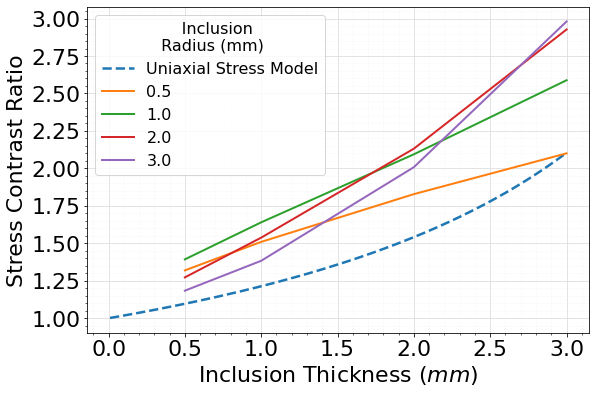

In [7]:
# 2D single plot

%matplotlib inline

# Contrast in 1D with I0
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = np.arange(0.00001,0.003,0.00001) # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(I0)):
    def func(x):
        I0n = I0[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20n/L0) + I0n*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break
# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot(np.array(I0[0:len(root)])*1000, np.asarray(root)*10**0, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, np.array(StressContrast_OP)[:,i]*10**0, linewidth=2, label = str(v2s[i]*1000))
handles, labels = ax.get_legend_handles_labels()
#plt.title("Detec")
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper left", title = "     Inclusion \n Radius (mm)")
plt.show()

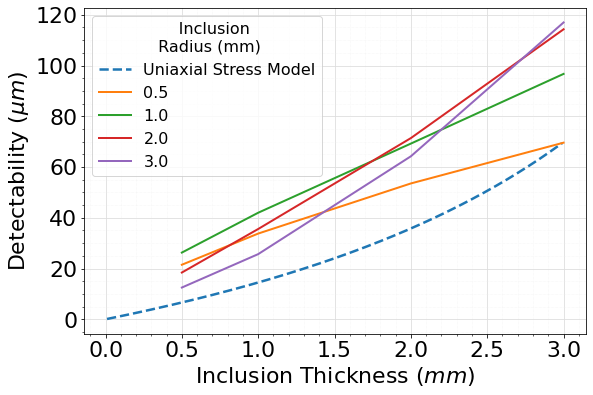

In [5]:
# 2D single plot

%matplotlib inline

# Detectability in 1D with I0
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = np.arange(0.00001,0.003,0.00001) # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(I0)):
    def func(x):
        I0n = I0[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20n/L0) + I0n*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot(np.array(I0[0:len(root)])*1000, np.asarray(root)*10**6, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
for i in range(0,len(v2s)):
    plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2, label = str(v2s[i]*1000))
handles, labels = ax.get_legend_handles_labels()
#plt.title("Detec")
plt.xlabel("Inclusion Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 3.5, 0.5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.rcParams.update({'font.size': 16})
plt.legend(handles, labels, loc = "upper left", title = "     Inclusion \n Radius (mm)")
plt.show()

<IPython.core.display.Javascript object>


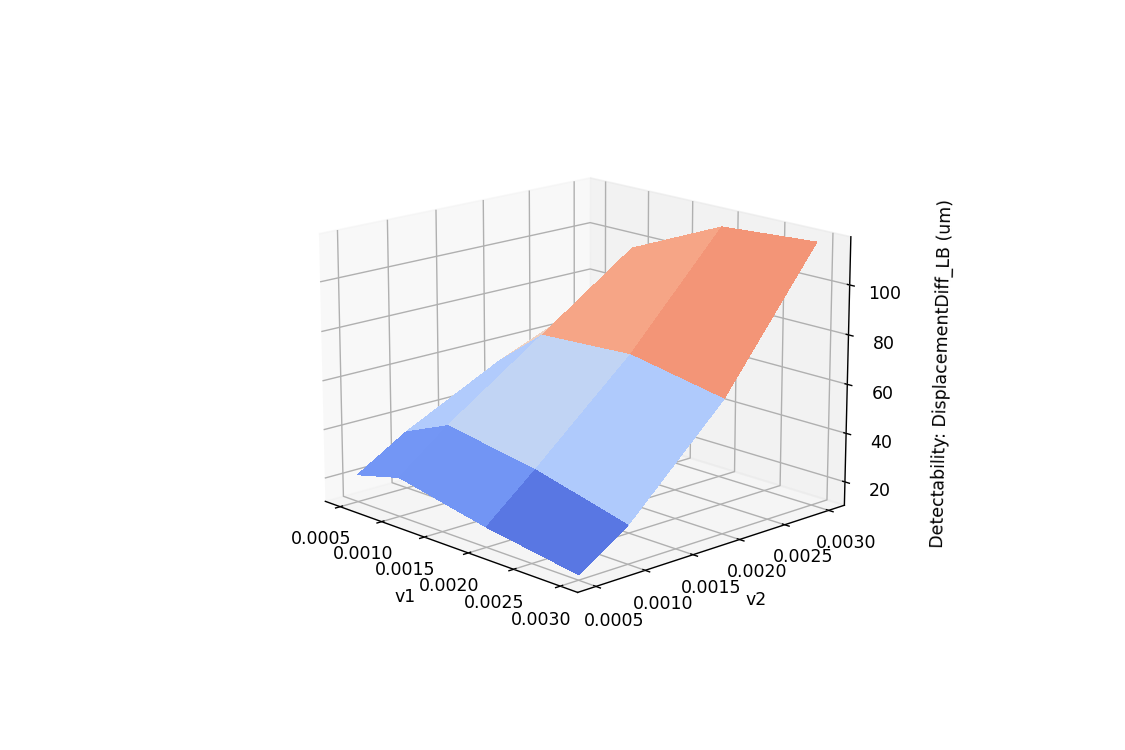

<IPython.core.display.Javascript object>


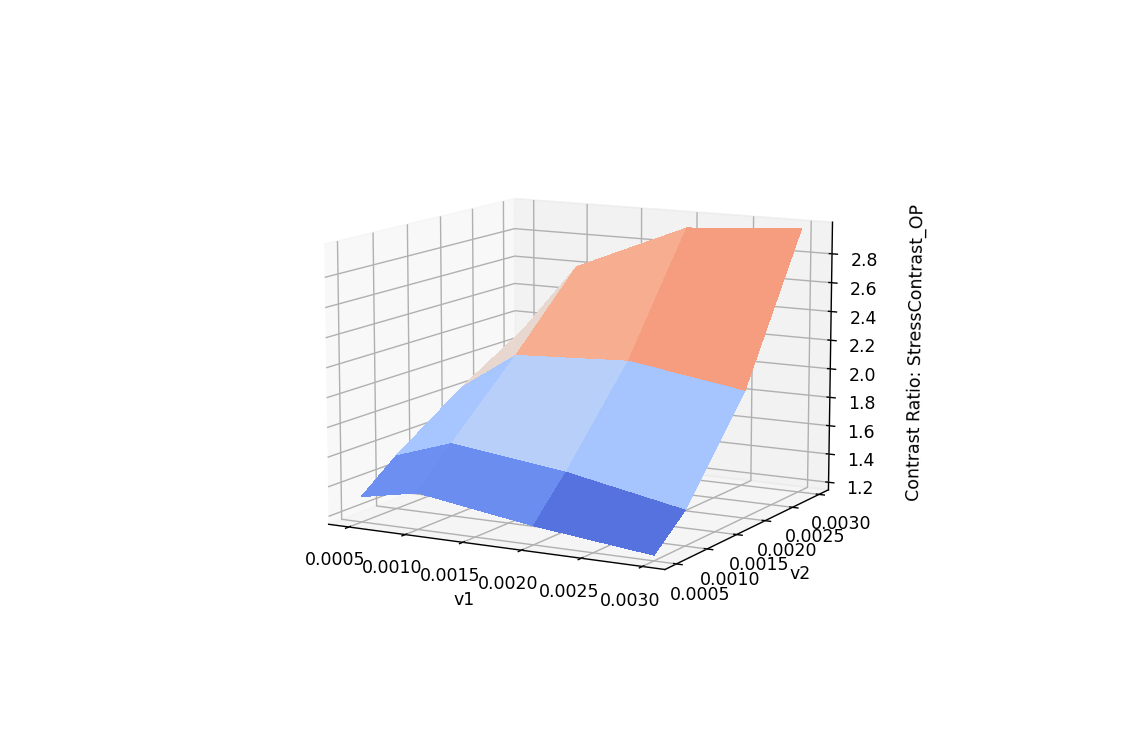

<IPython.core.display.Javascript object>


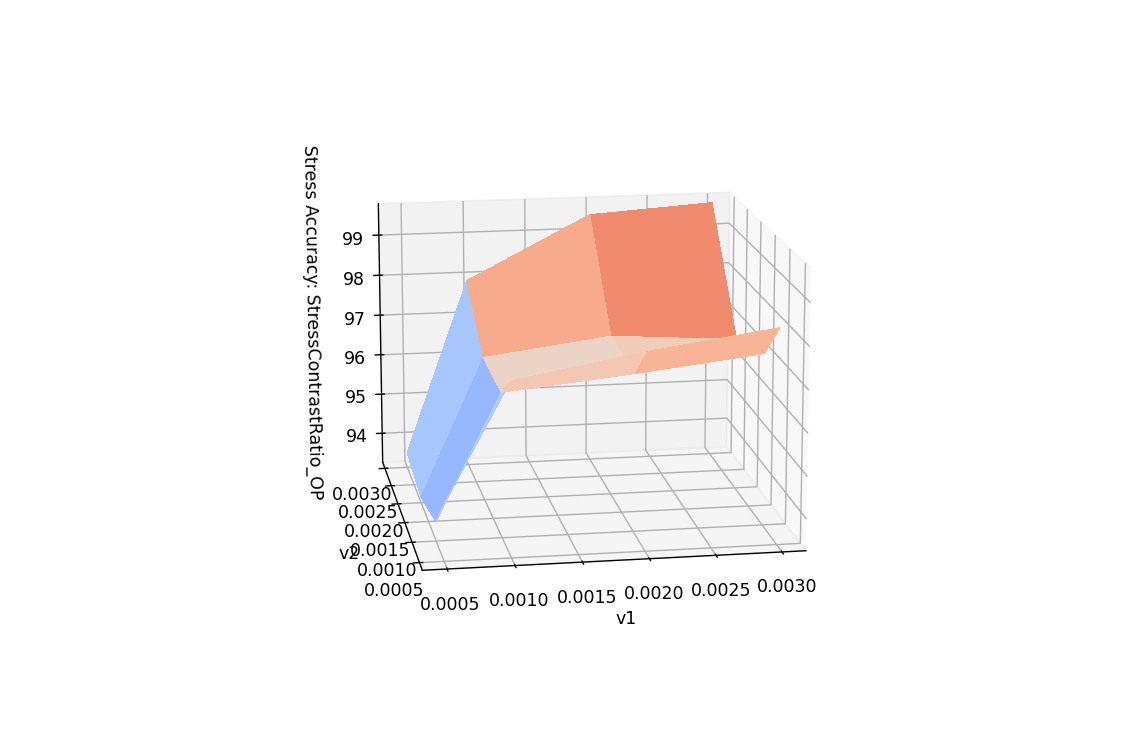

<IPython.core.display.Javascript object>


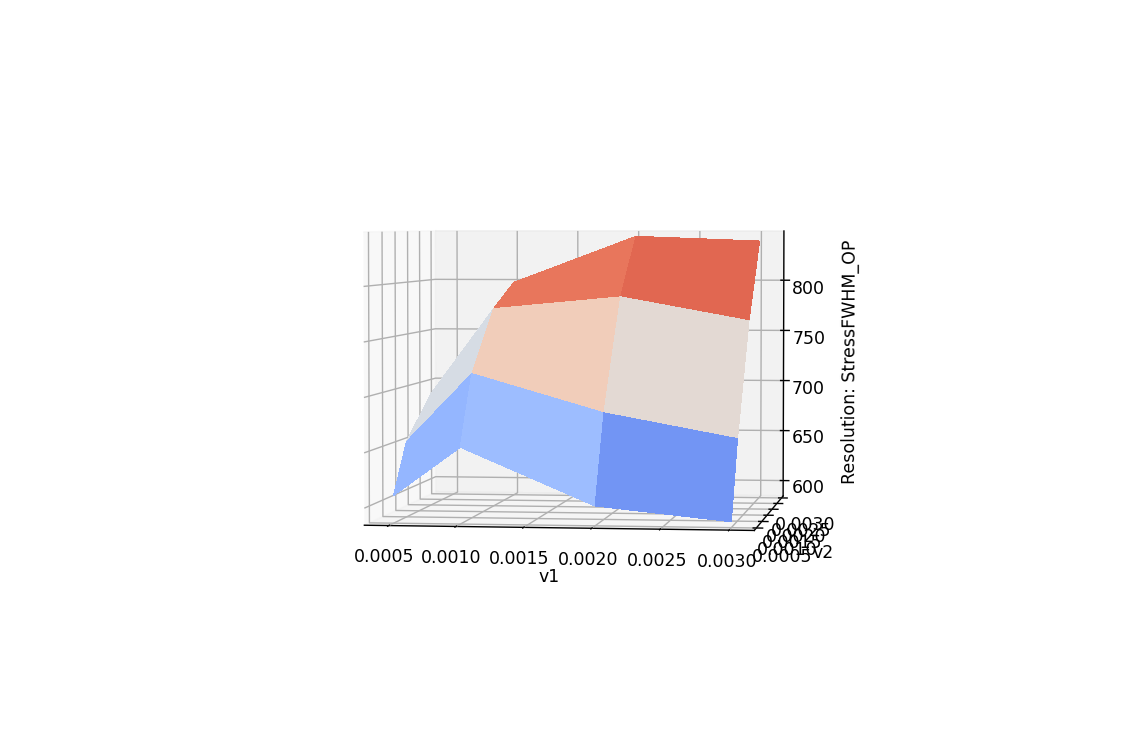

In [4]:
%matplotlib notebook

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(DisplacementDiff_LB)*10**6
Y, X = np.meshgrid(Y, X)
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Detectability: DisplacementDiff_LB (um)', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressContrast_OP)
Y, X = np.meshgrid(Y, X)
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Contrast Ratio: StressContrast_OP', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressContrastRatio_OP)*100
Y, X = np.meshgrid(Y, X)
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Stress Accuracy: StressContrastRatio_OP', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressFWHM_OP)*10**6
Y, X = np.meshgrid(Y, X)
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Resolution: StressFWHM_OP', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

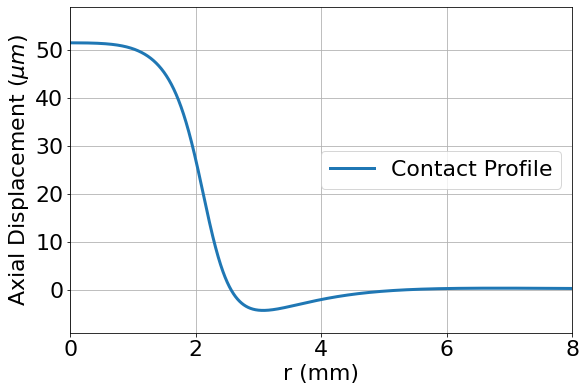

displacement diff LB:  0.05145681428257377  mm
contrast ratio OP:  0.9680702442175726


In [107]:
%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)

v1 = -1
v2 = 5

plt.plot(Det_x, Det_y, label = "Contact Profile", linewidth=3)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right")
plt.xlabel("r (mm)")
plt.ylabel("Axial Displacement ($\mu m$)")
plt.grid()
plt.xlim([0,8])
plt.ylim([-9,59])
plt.show()

print("displacement diff LB: ",DisplacementDiff_LB[v1][v2]*1000, " mm")
print("contrast ratio OP: ",StressContrastRatio_OP[v1][v2])

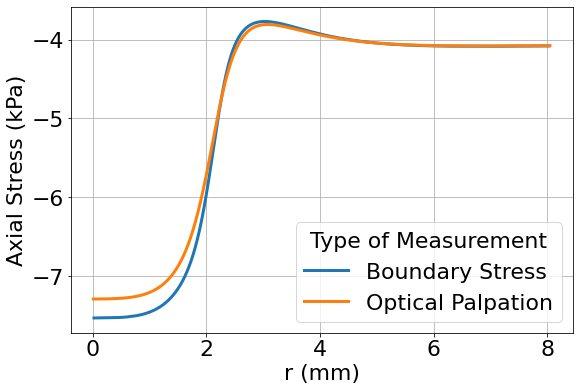

displacement diff LB:  0.05145681428257377  mm
contrast ratio OP:  0.9680702442175726


In [96]:
# Specify v1 and v2
%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)

v1 = -1
v2 = 5
#plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB_0.5mm", linewidth=3)
plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "Boundary Stress", linewidth=3)
#plt.plot(np.array(Stress_BOP2[v1][v2])[:,0]*1000, np.array(Stress_BOP2[v1][v2])[:,1]/1000, label = "BOP_", linewidth=3)
plt.plot(np.array(Stress_OP[v1][v2])[:,0]*1000, np.array(Stress_OP[v1][v2])[:,1]/1000, label = "Optical Palpation", linewidth=3)
#plt.plot(np.array(Stress_SOP[v1][v2])[:,0]*1000, np.array(Stress_SOP[v1][v2])[:,1]/1000, label = "SOP_", linewidth=3)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Type of Measurement")
#plt.title("Axial Stress Measurements")
plt.xlabel("r (mm)")
plt.ylabel("Axial Stress (kPa)")
plt.grid()
#plt.xlim([0,2])
plt.show()

print("displacement diff LB: ",DisplacementDiff_LB[v1][v2]*1000, " mm")
print("contrast ratio OP: ",StressContrastRatio_OP[v1][v2])

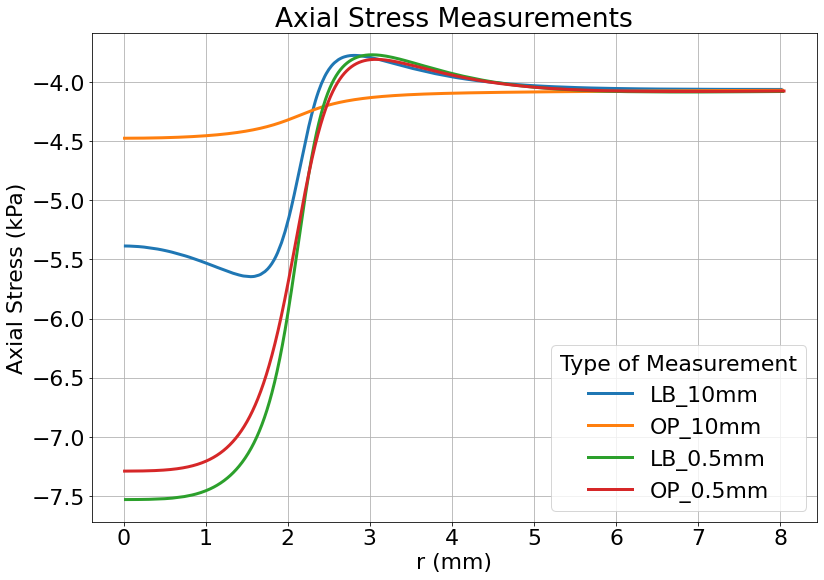

displacement diff LB:  0.05145681428257377  mm
contrast ratio OP:  0.9680702442175726


In [86]:
# Specify v1 and v2
%matplotlib inline

v1 = 0
v2 = 5

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB_10mm", linewidth=3)
#plt.plot(np.array(Stress_BOP2[v1][v2])[:,0]*1000, np.array(Stress_BOP2[v1][v2])[:,1]/1000, label = "BOP_", linewidth=3)
plt.plot(np.array(Stress_OP[v1][v2])[:,0]*1000, np.array(Stress_OP[v1][v2])[:,1]/1000, label = "OP_10mm", linewidth=3)
#plt.plot(np.array(Stress_SOP[v1][v2])[:,0]*1000, np.array(Stress_SOP[v1][v2])[:,1]/1000, label = "SOP_", linewidth=3)

v1 = -1
v2 = 5
#plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB_0.5mm", linewidth=3)
plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB_0.5mm", linewidth=3)
#plt.plot(np.array(Stress_BOP2[v1][v2])[:,0]*1000, np.array(Stress_BOP2[v1][v2])[:,1]/1000, label = "BOP_", linewidth=3)
plt.plot(np.array(Stress_OP[v1][v2])[:,0]*1000, np.array(Stress_OP[v1][v2])[:,1]/1000, label = "OP_0.5mm", linewidth=3)
#plt.plot(np.array(Stress_SOP[v1][v2])[:,0]*1000, np.array(Stress_SOP[v1][v2])[:,1]/1000, label = "SOP_", linewidth=3)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Type of Measurement")
plt.title("Axial Stress Measurements")
plt.xlabel("r (mm)")
plt.ylabel("Axial Stress (kPa)")
plt.grid()
#plt.xlim([0,2])
plt.show()

print("displacement diff LB: ",DisplacementDiff_LB[v1][v2]*1000, " mm")
print("contrast ratio OP: ",StressContrastRatio_OP[v1][v2])

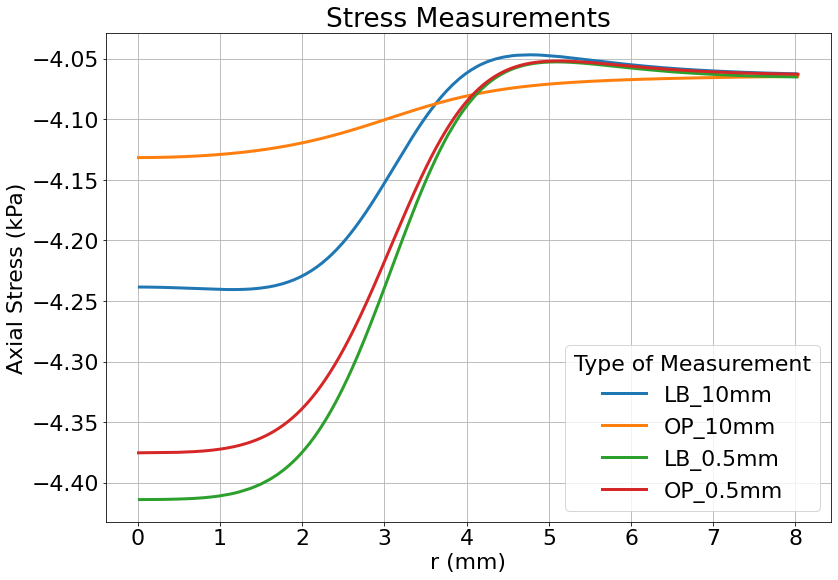

displacement diff LB:  0.005275042378343657  mm
contrast ratio OP:  0.991260673781029


In [57]:
# Specify v1 and v2
%matplotlib inline

v1 = 0
v2 = 5

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(13,9))
ax = plt.subplot(1,1,1)

plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB_10mm", linewidth=3)
#plt.plot(np.array(Stress_BOP2[v1][v2])[:,0]*1000, np.array(Stress_BOP2[v1][v2])[:,1]/1000, label = "BOP_", linewidth=3)
plt.plot(np.array(Stress_OP[v1][v2])[:,0]*1000, np.array(Stress_OP[v1][v2])[:,1]/1000, label = "OP_10mm", linewidth=3)
#plt.plot(np.array(Stress_SOP[v1][v2])[:,0]*1000, np.array(Stress_SOP[v1][v2])[:,1]/1000, label = "SOP_", linewidth=3)

v1 = -1
v2 = 5
#plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB_0.5mm", linewidth=3)
plt.plot(np.array(Stress_LB[v1][v2])[:,0]*1000, np.array(Stress_LB[v1][v2])[:,1]/1000, label = "LB_0.5mm", linewidth=3)
#plt.plot(np.array(Stress_BOP2[v1][v2])[:,0]*1000, np.array(Stress_BOP2[v1][v2])[:,1]/1000, label = "BOP_", linewidth=3)
plt.plot(np.array(Stress_OP[v1][v2])[:,0]*1000, np.array(Stress_OP[v1][v2])[:,1]/1000, label = "OP_0.5mm", linewidth=3)
#plt.plot(np.array(Stress_SOP[v1][v2])[:,0]*1000, np.array(Stress_SOP[v1][v2])[:,1]/1000, label = "SOP_", linewidth=3)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Type of Measurement")
plt.title("Stress Measurements")
plt.xlabel("r (mm)")
plt.ylabel("Axial Stress (kPa)")
plt.grid()
#plt.xlim([0,2])
plt.show()

print("displacement diff LB: ",DisplacementDiff_LB[v1][v2]*1000, " mm")
print("contrast ratio OP: ",StressContrastRatio_OP[v1][v2])

In [48]:
1.0/15.0*10**3 # minimum distance change SOP can detect in um

66.66666666666667

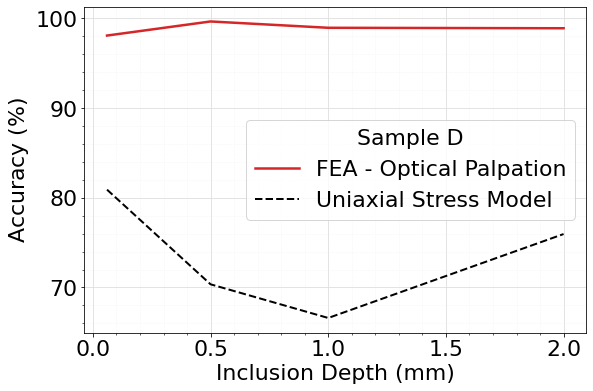

ID:  0.002
IT:  0.003
IR:  0.003
IE:  250000
P:  0.15


In [36]:
# 2D single plot Accuracy 1d with depth
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = np.asarray(v2s) # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0     *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(S10)):
    def func(x):
        S10n = S10[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10n/L0+S20n/L0) + I0*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-30)], method='brentq')
    root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, (1-np.abs(1-np.array(StressContrastRatio_OP)[:,i]))*10**2, color='tab:red', linewidth=2.5, label = "FEA - Optical Palpation")
plt.plot(np.array(v1s)*1000, (1-np.abs(1-(np.asarray(root)/np.array(StressContrast_LB)[:,i])))*10**2, color='black', linestyle='dashed', linewidth=2, label = "Uniaxial Stress Model")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right", title = "Sample D")
#plt.title("Title")
plt.xlabel("Inclusion Depth (mm)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 2.1, 0.5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Accuracy ($\%$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P)

plt.rcParams.update({'font.size': 12})

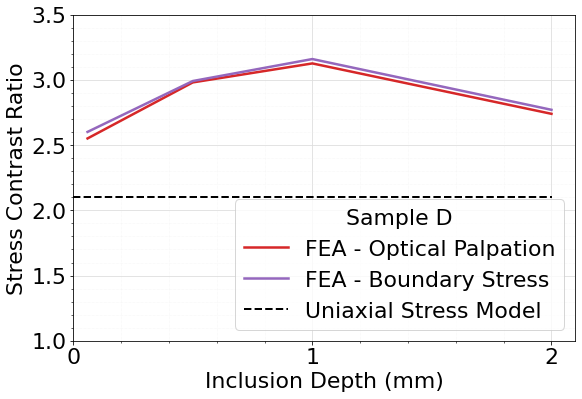

In [34]:
# Contrast Ratio in 1D with Depth
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = np.arange(0.000001,0.002051,0.00005) # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0     *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(S10)):
    def func(x):
        S10n = S10[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10n/L0+S20n/L0) + I0*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-30)], method='brentq')
    root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*10**3, np.array(StressContrast_OP)[:,i], color='tab:red', linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(v1s)*10**3, np.array(StressContrast_LB)[:,i], color='tab:purple', linewidth=2.5, label = "FEA - Boundary Stress")
plt.plot(np.array(S10[0:len(root)])*10**3, np.asarray(root), color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Sample D")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Inclusion Depth (mm)")
ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.ylim([1,3.5])
plt.xlim([0,2.1])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

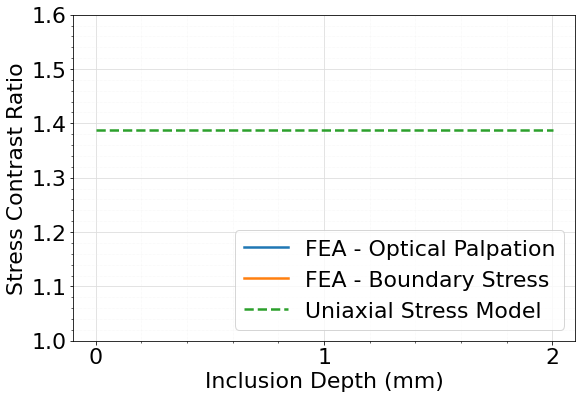

In [90]:
# Contrast Ratio in 1D with Depth
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = np.arange(0.000001,0.002051,0.00005) # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0     *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*2 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(S10)):
    def func(x):
        S10n = S10[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10n/L0+S20n/L0) + I0*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-30)], method='brentq')
    root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.array(v2s)*10**3, np.array(StressContrast_OP)[i,:], linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(v2s)*10**3, np.array(StressContrast_LB)[i,:], linewidth=2.5, label = "FEA - Boundary Stress")
plt.plot(np.array(S10[0:len(root)])*10**3, np.asarray(root), linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right")#, title = "Measurement")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Inclusion Depth (mm)")
ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.ylim([1,1.6])
#plt.xlim([0,51])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.002
IT:  0.003
IR:  0.003
IE:  250000
LT:  0.004


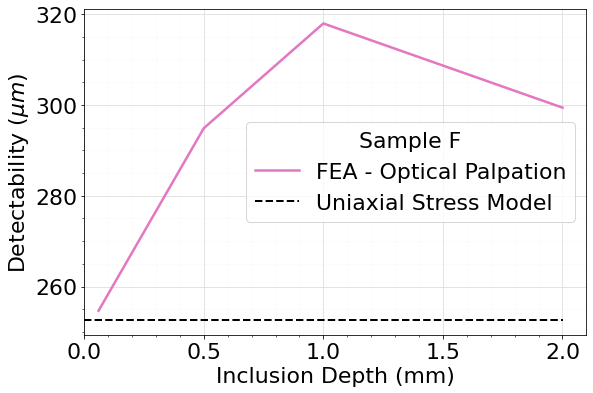

In [30]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Depth
S0 = 0.005 # Initial Sample Thickness
L0 = 0.004 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = np.arange(0.000001,0.002051,0.00005) # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0     *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*10 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(S10)):
    def func(x):
        S10n = S10[n]
        S20n = S20[n]
        return ( (L0*(1-P)-x)*(1+S10n/L0+S20n/L0) + I0*((L0*(1-P)-x)/L0)**(E/Ei) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-30)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, color='tab:pink', linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(S10[0:len(root)])*1000, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right", title = "Sample F")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Inclusion Depth (mm)")
ax.xaxis.set_ticks(np.arange(0, 2.1, 0.5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.xlim([0,2.1])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

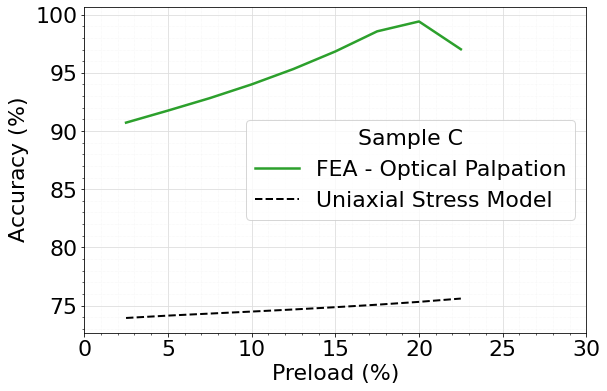

ID:  0.001
IT:  0.002
IR:  0.002
IE:  187500.0
P:  [0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3  ]


In [45]:
# 2D single plot Accuracy with Preload
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*7.5 *10.0**3.0 # Inclusion Elasticity
P = np.array(v2s) # Preload, + in compression

root = []
for n in range(0,len(P)):
    def func(x):
        Pn = P[n]
        return ( (L0*(1-Pn)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-Pn)-x)/L0)**(E/Ei) - L0*(1-Pn) - S0*(1-Pn) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P[n])-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P[n])-1*10**(-30)], method='brentq')
    root.append(np.log((L0*(1-P[n])-sol.root)/L0)*E / (np.log(1-P[n])*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.array(v2s)*100, (1-np.abs(1-np.array(StressContrastRatio_OP)[i,:]))*10**2, color='tab:green', linewidth=2.5, label = "FEA - Optical Palpation")
plt.plot(np.array(v2s)*100, (1-np.abs(1-(np.asarray(root)/np.array(StressContrast_LB)[i,:])))*10**2, linewidth=2, color='black', linestyle='dashed', label = "Uniaxial Stress Model")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "center right", title = "Sample C")
#plt.title("Title")
plt.xlabel("Preload (%)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 30.5, 5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Accuracy ($\%$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P)

plt.rcParams.update({'font.size': 12})

LE Iteration:  936  failed


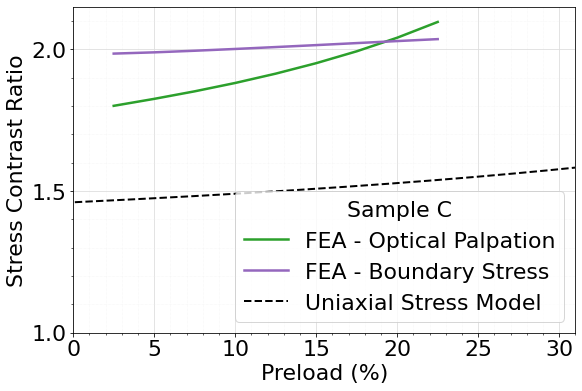

In [47]:
# Contrast Ratio in 1D with Preload
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*7.5 *10.0**3.0 # Inclusion Elasticity
P = np.arange(0.1,100,0.1) /100.0 # Preload, + in compression

root = []
for n in range(0,len(P)):
    def func(x):
        Pn = P[n]
        return ( (L0*(1-Pn)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-Pn)-x)/L0)**(E/Ei) - L0*(1-Pn) - S0*(1-Pn) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P[n])-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P[n])-1*10**(-30)], method='brentq')
    root.append(np.log((L0*(1-P[n])-sol.root)/L0)*E / (np.log(1-P[n])*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.nan,np.nan)
plt.plot(np.nan,np.nan)
plt.plot(np.array(v2s)*100, np.array(StressContrast_OP)[i,:], linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(v2s)*100, np.array(StressContrast_LB)[i,:], linewidth=2.5, color = 'tab:purple', label = "FEA - Boundary Stress")
plt.plot(np.array(P[0:len(root)])*100, np.asarray(root), linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Sample C")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Preload (%)")
ax.xaxis.set_ticks(np.arange(0, 50.5, 5))
ax.yaxis.set_ticks(np.arange(0, 2.3, 0.5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.ylim([1,2.15])
plt.xlim([0,31])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.002
IT:  0.003
IR:  0.003
IE:  250000


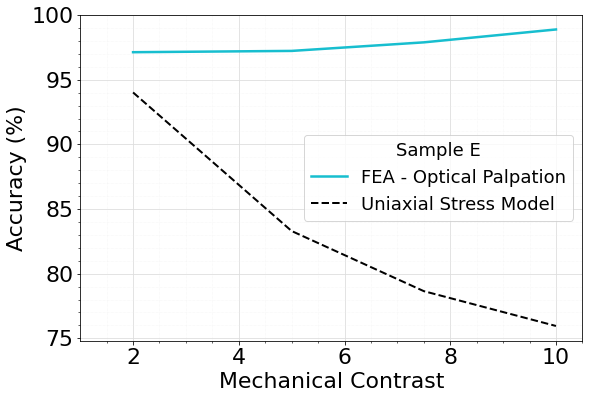

In [52]:
print("ID: ",ID[i])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Accuracy in 1D with Mech Con
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = np.asarray(v2s) # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(Ei)):
    def func(x):
        Ein = Ei[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-P)-x)/L0)**(E/Ein) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.array(v2s)/E, (1-np.abs(1-np.array(StressContrastRatio_OP)[i,:]))*10**2, color='tab:cyan', linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(Ei[0:len(root)])/E, (1-np.abs(1-(np.asarray(root)/np.array(StressContrast_LB)[i,:])))*10**2, color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 18})
plt.legend(handles, labels, loc = "center right", title = "Sample E")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Mechanical Contrast")
ax.xaxis.set_ticks(np.arange(0, 11, 2))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.xlim([1,10.5])
plt.ylabel("Accuracy (%)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.002
IT:  0.003
IR:  0.001
IE:  250000


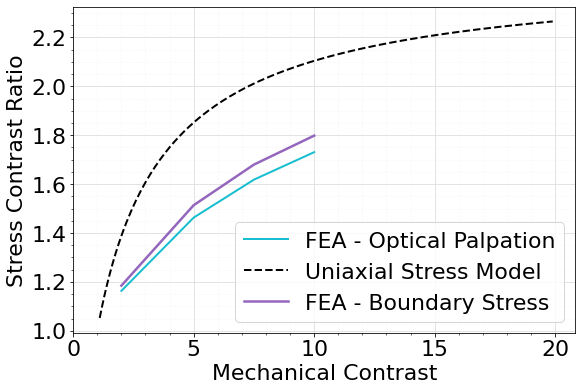

In [61]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[i])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Contrast in 1D with Mech Con
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*np.arange(1.1,20,0.1) *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(Ei)):
    def func(x):
        Ein = Ei[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-P)-x)/L0)**(E/Ein) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0*(1-P)-sol.root)/L0)*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=1
plt.plot(np.array(v2s)/E, np.array(StressContrast_OP)[i,:]*10**0, color='tab:cyan', linewidth=2, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(Ei[0:len(root)])/E, np.asarray(root)*10**0, color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")
plt.plot(np.array(v2s)/E, np.array(StressContrast_LB)[i,:], color='tab:purple', linewidth=2.5, label = "FEA - Boundary Stress")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right") #, title = "Sample E")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Mechanical Contrast")
ax.xaxis.set_ticks(np.arange(0, 21, 5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.002
IT:  0.003
IR:  0.003
IE:  250000


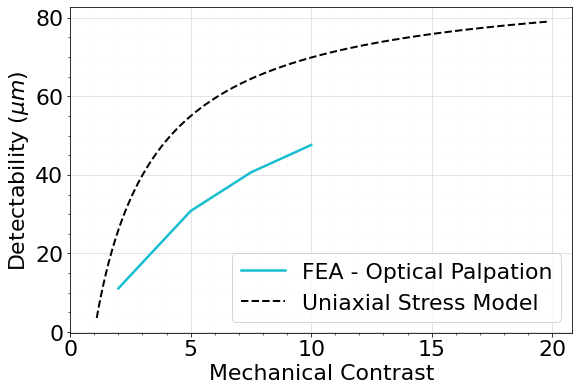

In [59]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[i])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with mech con
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*np.arange(1.1,20,0.1) *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(Ei)):
    def func(x):
        Ein = Ei[n]
        return ( (L0*(1-P)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-P)-x)/L0)**(E/Ein) - L0*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=1
plt.plot(np.array(v2s)/E, np.array(DisplacementDiff_LB)[i,:]*10**6, color='tab:cyan', linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(Ei[0:len(root)])/E, np.asarray(root)*10**6, color='black', linewidth=2, linestyle='--', label="Uniaxial Stress Model")

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right") #, title = "Sample E")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Mechanical Contrast")
ax.xaxis.set_ticks(np.arange(0, 21, 5))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

In [ ]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Preload
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*7.5 *10.0**3.0 # Inclusion Elasticity
P = np.arange(0.1,100,0.1) /100.0 # Preload, + in compression

root = []
for n in range(0,len(P)):
    def func(x):
        Pn = P[n]
        return ( (L0*(1-Pn)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-Pn)-x)/L0)**(E/Ei) - L0*(1-Pn) - S0*(1-Pn) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P[n])-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P[n])-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.array(v2s)*100, np.array(DisplacementDiff_LB)[i,:]*10**6, linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(P[0:len(root)])*100, np.asarray(root)*10**6, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right")#, title = "Measurement")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Preload (%)")
ax.xaxis.set_ticks(np.arange(0, 101, 10))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.001
IT:  0.003
IR:  0.0005
IE:  250000
LE Iteration:  895  failed


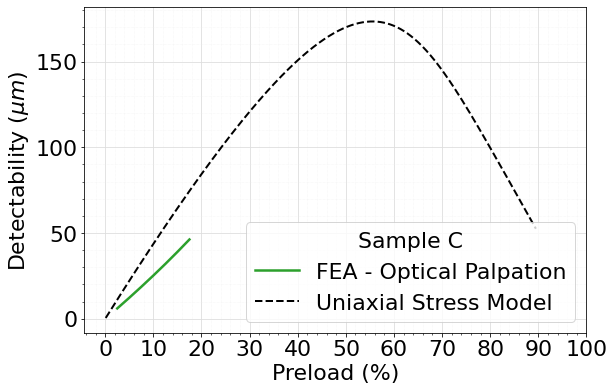

In [5]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Preload
S0 = 0.005 # Initial Sample Thickness
L0 = 0.0005 # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*7.5 *10.0**3.0 # Inclusion Elasticity
P = np.arange(0.1,100,0.1) /100.0 # Preload, + in compression

root = []
for n in range(0,len(P)):
    def func(x):
        Pn = P[n]
        return ( (L0*(1-Pn)-x)*(1+S10/L0+S20/L0) + I0*((L0*(1-Pn)-x)/L0)**(E/Ei) - L0*(1-Pn) - S0*(1-Pn) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0*(1-P[n])-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P[n])-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=-1
plt.plot(np.nan,np.nan)
plt.plot(np.nan,np.nan)
plt.plot(np.array(v2s)*100, np.array(DisplacementDiff_LB)[i,:]*10**6, linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(P[0:len(root)])*100, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
plt.plot([0,],np.nan)

y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Sample C")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Preload (%)")
ax.xaxis.set_ticks(np.arange(0, 101, 10))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.0005
IT:  0.002
IR:  0.003
IE:  125000


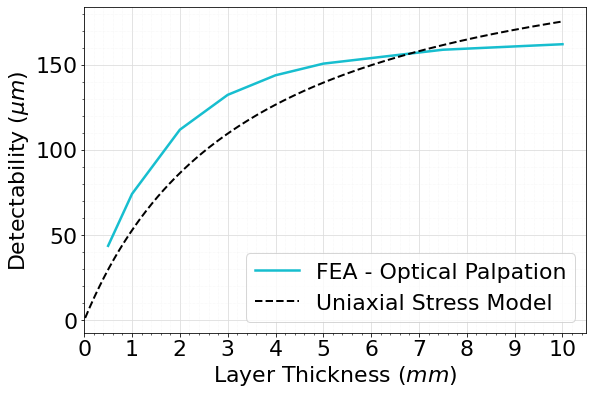

In [6]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),10*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.0005 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*5 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=5
plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2.5, color='tab:cyan' , label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_P1)[:,i]*10**6, linewidth=2.5, label = "SOP")
plt.plot(np.array(L0[0:len(root)])*1000, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
# SOP
S0 = 0.005 + 500*10**(-6) # Initial Sample Thickness
L0 = np.arange(520*10**(-6),50*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.001 + 500*10**(-6) # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 250.0 *7.5**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression
rootSOP = []
for n in range(0,len(L0)):
    L0n = L0[n] - 500*10**(-6)
    def func(x):
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0n*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0n*(1-P)-1*10**(-20)], method='brentq')
    rootSOP.append(sol.root)
    if not np.isclose(func(rootSOP[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        rootSOP = rootSOP[0:-1]
        break
#plt.plot(np.array(L0[0:len(rootSOP)])*1000, np.asarray(rootSOP)*10**6, linewidth=2.5, label="Uniaxial Stress - SOP")
# ^^^ SOP
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
#plt.plot([0,10],[5.5,5.5], linewidth=1, linestyle='--', label="OCT Axial Sensitivity")
#plt.plot([0,10],[0.5,0.5], linewidth=1, linestyle='--', label="CFE Axial Sensitivity")
#plt.plot([0,10],[67,67], linewidth=1, linestyle='--', label="SOP Axial Sensitivity")

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right" ) #, title = "Sample ")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.xlim([0,10.5])
#plt.ylim([0,200])
plt.ylabel("Detectability ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

ID:  0.0005
IT:  0.002
IR:  0.003
IE:  125000


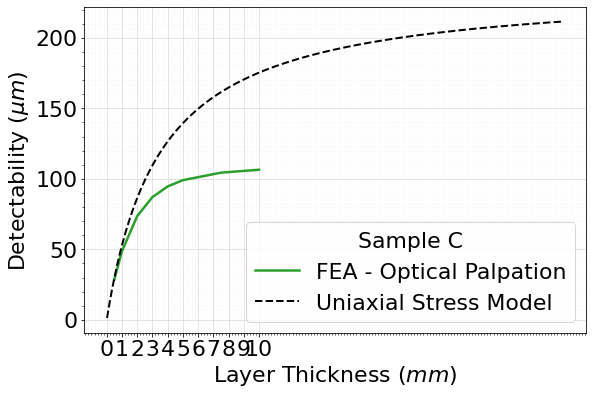

In [4]:
print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
#print("P: ",P[nP])

# Detectability in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),30*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*5 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(sol.root)
    if not np.isclose(func(root[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break

# 2D single plot

%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, np.array(DisplacementDiff_LB)[:,i]*10**6, linewidth=2.5, color='tab:green' , label = "FEA - Optical Palpation")
plt.plot(np.array(L0[0:len(root)])*1000, np.asarray(root)*10**6, linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Sample C")
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
plt.ylabel("Detectability ($\mu m$)")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

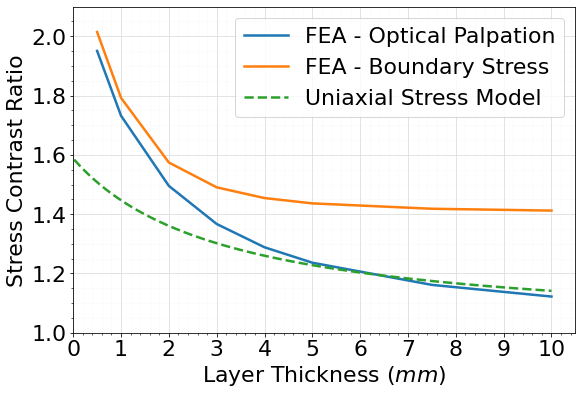

In [12]:
# Contrast Ratio in 1D with Layer Thickness, take 2
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),10*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
S10 = 0.0005 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*7.5 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0[n]*(1-P)-sol.root)/L0[n])*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=2
plt.plot(np.array(v1s)*1000, np.array(StressContrast_OP)[:,i], linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(v1s)*1000, np.array(StressContrast_LB)[:,i], linewidth=2.5, label = "FEA - Boundary Stress")
plt.plot(np.array(L0[0:len(root)])*1000, np.asarray(root), linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")#, title = "Measurement")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
plt.ylim([1,2.1])
plt.xlim([0,10.5])
plt.ylabel("Stress Contrast Ratio")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

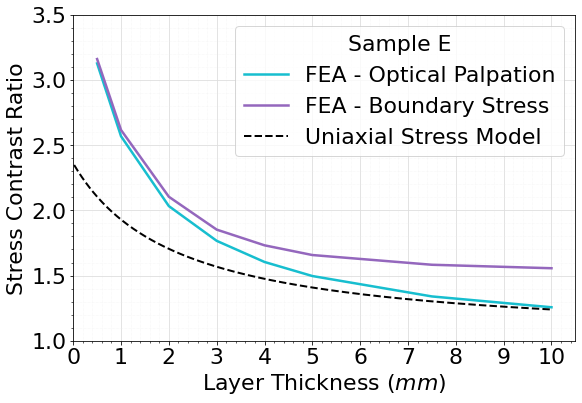

In [19]:
# Contrast Ratio in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),10*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 250.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0[n]*(1-P)-sol.root)/L0[n])*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, np.array(StressContrast_OP)[:,i], linewidth=2.5, color='tab:cyan', label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(v1s)*1000, np.array(StressContrast_LB)[:,i], linewidth=2.5, color='tab:purple', label = "FEA - Boundary Stress")
plt.plot(np.array(L0[0:len(root)])*1000, np.asarray(root), linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right", title = "Sample E")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
plt.ylim([1,3.5])
plt.xlim([0,10.5])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

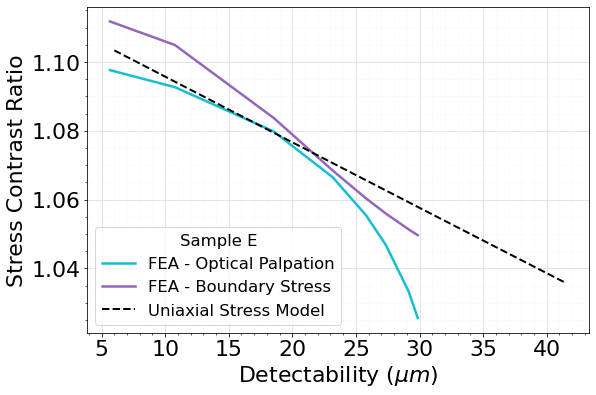

In [77]:
# Contrast Ratio in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(500*10**(-6),10*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.001 # Initial Inclusion Thickness
S10 = 0.0005 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 25.0*2 *10.0**3.0 # Inclusion Elasticity
P = 2.5*5 /100.0 # Preload, + in compression

root_C = []
root_D = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root_C.append(np.log((L0[n]*(1-P)-sol.root)/L0[n])*E / (np.log(1-P)*E))
    root_D.append(sol.root)
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=4
plt.plot(np.array(DisplacementDiff_LB)[:,i]*10**6, np.array(StressContrast_OP)[:,i], linewidth=2.5, color='tab:cyan', label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(DisplacementDiff_LB)[:,i]*10**6, np.array(StressContrast_LB)[:,i], linewidth=2.5, color='tab:purple', label = "FEA - Boundary Stress")
plt.plot(np.asarray(root_D)*10**6, np.asarray(root_C), linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16.5})
plt.legend(handles, labels, loc = "lower left", title = "Sample E")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Detectability ($\mu m$)")
#ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.ylim([1,3.1])
#plt.xlim([0,350])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

# BELOW IS PARAMETIC PLOT WITH LAYER THICKNESS CHANGING, GENERATING THE LINE

In [ ]:
%matplotlib notebook
#%matplotlib inline

plt.rcParams.update({'font.size': 16})

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressContrast_OP) #*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressMaxContrast_OP) #*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressContrast_LB) #*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')
print(FrameName)

X = np.array(v1s)
Y = np.array(v2s)
Z = np.array(StressMaxContrast_LB) #*10**6
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=np.nanmin(Z), vmax=np.nanmax(Z))
ax.set_ylabel('v2')
ax.set_xlabel('v1')
ax.set_zlabel('Metric', rotation=60)
ax.zaxis.labelpad = 10
ax.ticklabel_format(style='plain')
print(FrameName)

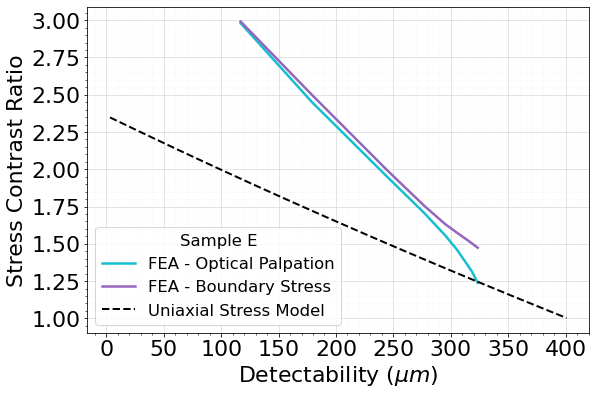

In [48]:
# Contrast Ratio in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = np.arange(20*10**(-6),1000*10**(-3),20*10**(-6)) # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 250.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root_C = []
root_D = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root_C.append(np.log((L0[n]*(1-P)-sol.root)/L0[n])*E / (np.log(1-P)*E))
    root_D.append(sol.root)
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(DisplacementDiff_LB)[:,i]*10**6, np.array(StressContrast_OP)[:,i], linewidth=2.5, color='tab:cyan', label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressContrast_BOP2)[:,i], linewidth=2.5, label = "FEA - BOP2")
plt.plot(np.array(DisplacementDiff_LB)[:,i]*10**6, np.array(StressContrast_LB)[:,i], linewidth=2.5, color='tab:purple', label = "FEA - Boundary Stress")
plt.plot(np.asarray(root_D)*10**6, np.asarray(root_C), linewidth=2, color='black', linestyle='--', label="Uniaxial Stress Model")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 16.5})
plt.legend(handles, labels, loc = "lower left", title = "Sample E")
#plt.title("Detectability in Optical Palpation with Layer Thickness")
plt.xlabel("Detectability ($\mu m$)")
#ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.ylim([1,3.1])
#plt.xlim([0,350])
plt.ylabel("Stress Contrast Ratio")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

plt.rcParams.update({'font.size': 12})

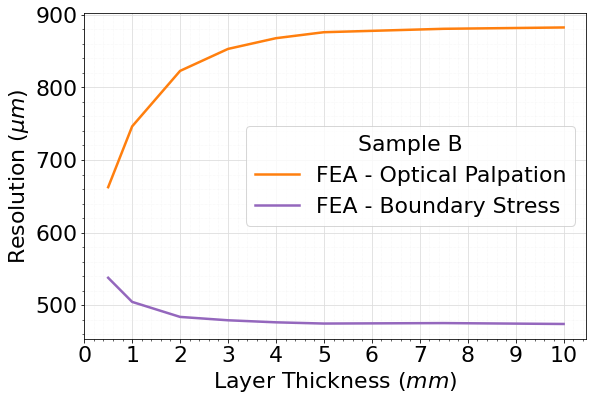

ID:  0.0005
IT:  0.001
IR:  0.003
IE:  125000
P:  0.15


In [28]:
# 2D single plot
# Resolution in 1D with layer thickness
%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, np.array(StressFWHM_OP)[:,i]*10**6, color='tab:orange', linewidth=2.5, label = "FEA - Optical Palpation")
#plt.plot(np.array(v1s)*1000, np.array(StressGaussFWHM_OP)[:,i]*10**6, linewidth=2.5, label = "FEA - OP")
plt.plot(np.array(v1s)*1000, np.array(StressGaussFWHM_LB)[:,i]*10**6, color='tab:purple', linewidth=2.5, label = "FEA - Boundary Stress")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "right", title = "Sample B")
#plt.title("Title")
plt.xlabel("Layer Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Resolution ($\mu m$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[i])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P[nP])

plt.rcParams.update({'font.size': 12})

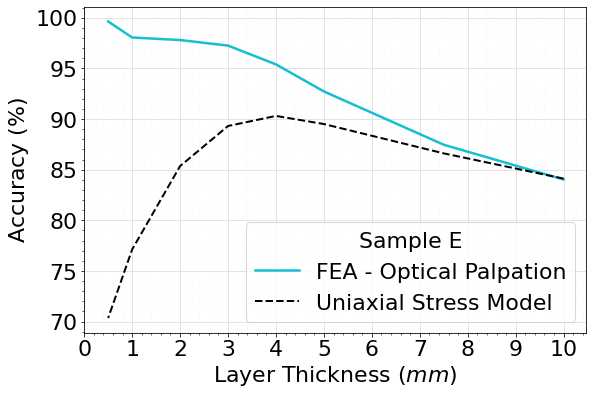

ID:  0.0005
IT:  0.003
IR:  0.003
IE:  250000
P:  0.15


In [31]:
# Accuracy in 1D with Layer Thickness
# 2D single plot
S0 = 0.005 # Initial Sample Thickness
L0 = np.array(v1s) # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 250.0 *10.0**3.0 # Inclusion Elasticity
P = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-P)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-P)-x)/L0n)**(E/Ei) - L0n*(1-P) - S0*(1-P) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-P)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-P)-1*10**(-20)], method='brentq')
    root.append(np.log((L0[n]*(1-P)-sol.root)/L0[n])*E / (np.log(1-P)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=3
plt.plot(np.array(v1s)*1000, np.array(StressContrastRatio_OP)[:,i]*10**2, color='tab:cyan', linewidth=2.5, label = "FEA - Optical Palpation")
plt.plot(np.array(v1s)*1000, (np.asarray(root)/np.array(StressContrast_LB)[:,i])*10**2, color='black', linestyle='dashed', linewidth=2, label = "Uniaxial Stress Model")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "lower right", title = "Sample E")
#plt.title("Title")
plt.xlabel("Layer Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Accuracy ($\%$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P)

plt.rcParams.update({'font.size': 12})

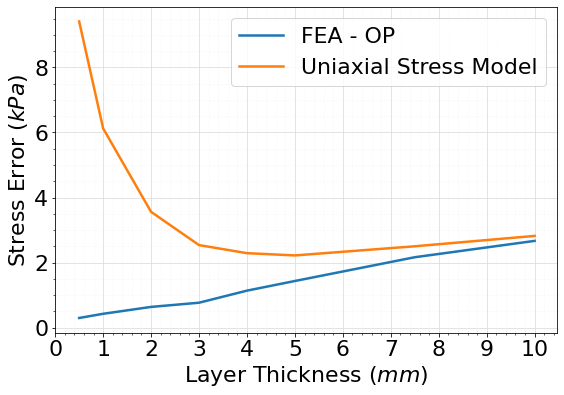

ID:  0.001
IT:  0.003
IR:  0.003
IE:  250000
P:  0.3


In [95]:
# 2D single plot
S0 = 0.005 # Initial Sample Thickness
L0 = np.array(v1s) # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 250.0 *10.0**3.0 # Inclusion Elasticity
Pt = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-Pt)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-Pt)-x)/L0n)**(E/Ei) - L0n*(1-Pt) - S0*(1-Pt) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-Pt)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-Pt)-1*10**(-20)], method='brentq')
    root.append(np.log((L0[n]*(1-Pt)-sol.root)/L0[n])*E / (np.log(1-Pt)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=5
plt.plot(np.array(v1s)*1000, (1/1000)*(np.array(StressContrast_OP)[:,i]*(BackgroundElasticity*np.log(1-P[nP]))-np.array(StressContrast_LB)[:,i]*(BackgroundElasticity*np.log(1-P[nP]))), linewidth=2.5, label = "FEA - OP")
plt.plot(np.array(v1s)*1000, (1/1000)*(np.asarray(root)*(BackgroundElasticity*np.log(1-P[nP]))-np.array(StressContrast_LB)[:,i]*(BackgroundElasticity*np.log(1-P[nP]))), linewidth=2.5, label = "Uniaxial Stress Model")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")#, title = "Imaging Modality")
#plt.title("Title")
plt.xlabel("Layer Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Stress Error ($kPa$)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P[nP])

plt.rcParams.update({'font.size': 12})

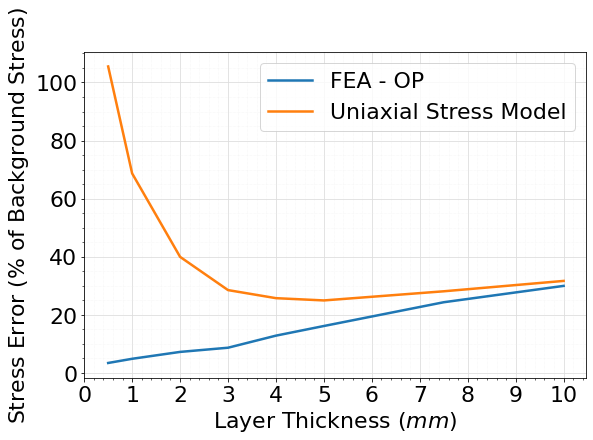

ID:  0.001
IT:  0.003
IR:  0.003
IE:  250000
P:  0.3


In [97]:
# 2D single plot
S0 = 0.005 # Initial Sample Thickness
L0 = np.array(v1s) # Initial Layer Thickness
I0 = 0.003 # Initial Inclusion Thickness
S10 = 0.001 # Inclusion Depth
S20 = S0-S10-I0 # Distance from bottom of inclusion to base of sample
E = 25.0 *10.0**3.0 # Layer and Sample Bulk Elasticity
Ei = 250.0 *10.0**3.0 # Inclusion Elasticity
Pt = 15.0 /100.0 # Preload, + in compression

root = []
for n in range(0,len(L0)):
    def func(x):
        L0n = L0[n]
        return ( (L0n*(1-Pt)-x)*(1+S10/L0n+S20/L0n) + I0*((L0n*(1-Pt)-x)/L0n)**(E/Ei) - L0n*(1-Pt) - S0*(1-Pt) )
    try: 
        sol = optimize.root_scalar(func, bracket=[-5*10**(-6), L0[n]*(1-Pt)-5*10**(-6)], method='brentq')
    except:
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0[n]*(1-Pt)-1*10**(-20)], method='brentq')
    root.append(np.log((L0[n]*(1-Pt)-sol.root)/L0[n])*E / (np.log(1-Pt)*E))
    if not np.isclose(func(sol.root), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        root = root[0:-1]
        break


%matplotlib inline

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
i=5
plt.plot(np.array(v1s)*1000, (100/(-BackgroundElasticity*np.log(1-P[nP])))*(np.array(StressContrast_OP)[:,i]*(BackgroundElasticity*np.log(1-P[nP]))-np.array(StressContrast_LB)[:,i]*(BackgroundElasticity*np.log(1-P[nP]))), linewidth=2.5, label = "FEA - OP")
plt.plot(np.array(v1s)*1000, (100/(-BackgroundElasticity*np.log(1-P[nP])))*(np.asarray(root)*(BackgroundElasticity*np.log(1-P[nP]))-np.array(StressContrast_LB)[:,i]*(BackgroundElasticity*np.log(1-P[nP]))), linewidth=2.5, label = "Uniaxial Stress Model")
#plt.plot(np.array(v1s)*1000, np.array(StressFWHM_SOP)[:,i]*10**6, linewidth=2.5, label = "SOP")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc = "upper right")#, title = "Imaging Modality")
#plt.title("Title")
plt.xlabel("Layer Thickness ($m m$)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))
#plt.xlim([0,10.5])
plt.ylabel("Stress Error ($\%$ of Background Stress)")
# Show the major grid and style it slightly.
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
ax.minorticks_on()
plt.show()

print("ID: ",ID[nID])
print("IT: ",IT[nIT])
print("IR: ",IR[nIR])
print("IE: ",IE[nIE])
#print("LT: ",LT[nLT])
print("P: ",P[nP])

plt.rcParams.update({'font.size': 12})

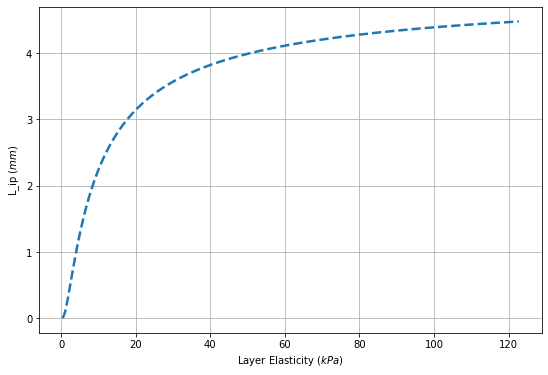

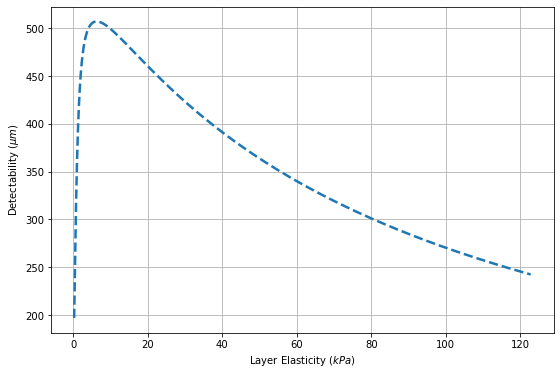

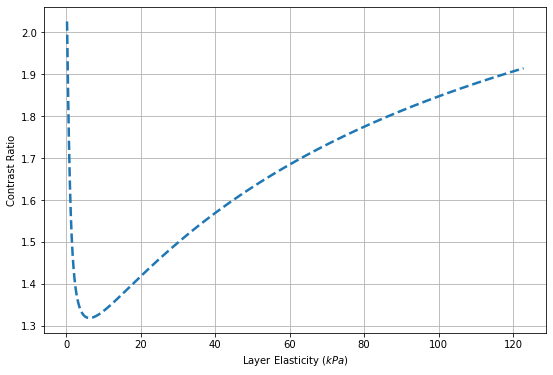

In [84]:
# Detectability in 1D with Layer Thickness
S0 = 0.005 # Initial Sample Thickness
L0 = 0.005 # Initial Layer Thickness
I0 = 0.002 # Initial Inclusion Thickness
Si0 = S0 - I0 # Total sample bulk thickness
El = np.arange(0.01,5,0.01) *25.0*10.0**3.0 # Layer Elasticity
Es = 25.0*1.0 *10.0**3.0 # Sample Bulk Elasticity
Ei = 25.0*5.0 *10.0**3.0 # Inclusion Elasticity
P = 25.0 /100.0 # Preload, + in compression

Lip = []
Det = []
Con = []
for n in range(0,len(El)):
    def func(x): # x is L_ip
        Eln = El[n]
        return (x+Si0*(x/L0)**(Eln/Es)+I0*(x/L0)**(Eln/Ei)) - (L0*(1-P)**(Es/Eln)+S0*(1-P))
    try: 
        sol = optimize.root_scalar(func, bracket=[5*10**(-6), L0*(1-P)**(Es/El[n])], method='brentq')
    except:
        continue
    Lip.append(sol.root)
    Det.append(L0*(1-P)**(Es/El[n])-sol.root)
    Con.append(El[n]*np.log(sol.root/L0)/(Es*np.log(1-P)))
    if not np.isclose(func(Lip[-1]), [0.0]): # func(root) should be almost 0.0.
        print("LE Iteration: ", n, " failed")
        Lip = Lip[0:-1]
        Det = Det[0:-1]
        Con = Con[0:-1]
        break

# 2D single plot

%matplotlib inline
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot(np.array(El[0:len(Lip)])/1000, np.asarray(Lip)*10**3, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
plt.xlabel("Layer Elasticity ($kPa$)")
plt.ylabel("L_ip ($m m$)")
plt.grid()
plt.show()

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot((np.array(El[0:len(Det)]))/1000, np.asarray(Det)*10**6, linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
plt.xlabel("Layer Elasticity ($kPa$)")
plt.ylabel("Detectability ($\mu m$)")
plt.grid()
plt.show()

plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.plot((np.array(El[0:len(Con)]))/1000, np.asarray(Con), linewidth=2.5, linestyle='--', label="Uniaxial Stress Model")
plt.xlabel("Layer Elasticity ($kPa$)")
plt.ylabel("Contrast Ratio")
plt.grid()
plt.show()


In [ ]:
# NOT FINISHED CHANGING TO USE BOUNDARY CONDITIONS FOR ALL COMPARISONS WITH THE FAR FIELD